# **도시 인구의 메시지, 울리는 범죄 경보**

작성자: 김민채

## **프로젝트 목표**
1979년부터 2019년까지 41년 간 집계된 미국의 **도시 인구 수**와 **범죄**의 회귀분석 프로젝트<br>
### What impact does Population have on crimes?<br>
범죄 발생에 인구 수는 영향력을 미칠까?<br>
<br>
###정부로부터 통고가 날아왔다.<br>
**".. 더 이상 형사 범죄에 전보다 많은 예산을 집행할 수 없습니다.<br>
이렇게나 많은 요원들과 부서가 존재함에도 어째서 범죄 발생 현황은 크게 나아지질 않는 것인지<br>
본 부서의 범죄 예방 및 검거 능력에 많은 의구심이 듭니다.<br>
올해는 작년에 준하여 필요 최소한의 예산만이 집행됩니다.<br>
주어진 자원 안에서 본 부서의 존재 이유를 크게 느낄 수 있는 한 해가 되기를 기대합니다."**<br>  
<br>
### 줄어든 예산 속에서 형사 범죄 예방 및 필요 요원 배치를 위해 오직 인구 수만으로 범죄를 예측하라!
<br>

## **프로젝트 가설**
**주제**:<br>
도시 인구 수를 통한 범죄 발생 예측 시스템 도출<br>
<br> 

**귀무가설**:<br>
인구 수와 형법 범죄 발생건수는 인과관계가 없다.<br>
<br>


**가설 검증 방향**:<br>
1. 연간 범죄율 계산
- 인구 10만 명당 범죄 발생률 연 평균을 구해 범죄 발생 예측 정책 필요성 피력
 - 형법 범죄율은 인구 10만 명당 형법 범죄 발생건수를 나타낸다.
 - 형법 범죄율 계산 방식 = (형법 범죄 발생건수 ÷ 총인구) × 100,000<br>
 - 1979년부터 2018년까지 형법 범죄율 증가추이를 살펴본다.
 - 근 10년 간 형법 범죄 발생률 감소 여부를 확인한다.
 <br> 
2. 인구 수와 범죄 발생 간 상관관계 파악
- scatter plot(산점도) 및 피어슨 상관계수 적용
 - violent crime의 경우
 - property crime의 경우<br>
 <br>

3. 인구 수에 따른 범죄 발생률 인과관계 여부 분석
- 회귀분석(regression)
 - statsmodel의 ols 적용
  - 변수의 정규성: KDE(Kernel Density Estimation)
  - 변수의 선형 상관성: regplot  
  - 변수의 독립성: DW 검정(Durbin-Watson)
- 인구 수에 가장 큰 영향을 받는 형법 범죄 확인<br>
<br>
4. 2019년 인구 수를 통한 형법 범죄 발생 건수 예측
- 최적의 모델 구현
  - sklearn의 LinearRegression 적용
  - sklearn의 DecisionTreeRegressor, RandomForestRegressor 적용
  - sklearn의 GradientBoostingRegressor 적용
  - 모델 예측 정확도 목표 = 90 이상
 <br>
5. 정리<br>






## **환경설정**

In [1]:
### load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
### auto resize
%matplotlib inline

In [3]:
### pandas display option float format
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# ### install pandas profiling for description of df
# !pip install pandas-profiling==2.7.1
# from pandas_profiling import ProfileReport

In [5]:
### upload csv file method1
from google.colab import files
uploaded = files.upload()

Saving estimated_crimes_1979_2019.csv to estimated_crimes_1979_2019.csv


## **데이터셋**<br>
**estimated_crimes_1979_2019.csv**<br>
This dataset contains estimated data at the state and national level and was derived from the Summary Reporting System (SRS).<br>
These data reflect the estimates the FBI has traditionally included in its annual publications.<br>
the FBI's estimated crime totals for the nation and all 50 states, 1979 to current year available.<br>
[Federal Bureau of Investigation
Crime Data Explorer](https://crime-data-explorer.app.cloud.gov/pages/downloads)<br>
[csv file](https://s3-us-gov-west-1.amazonaws.com/cg-d4b776d0-d898-4153-90c8-8336f86bdfec/estimated_crimes_1979_2019.csv)<br>
<br>
## **특성**                    
- year : 년도
- state_abbr : 미국 주 명 약자 
- state_name : 미국 주 명                                     
- Population : 미국 주 인구 수                
- violent_crime_total : 강력범죄 총계      
- homicide : 살인죄
- rape_legacy : 2013년 법 개정 전 강간죄
- rape_revised : 2013년 법 개정 후 강간죄	
- robbery : 협박 혹은 폭력을 사용한 강도죄
- aggravated_assault : 가중 폭행죄                                       
- property_crime : 재산범죄 총계        
- burglary : 주거 침입 절도죄
- larceny : 절도죄               
- motor_vehicle_theft : 차량 절도죄        
- caveats : 주의사항 

In [6]:
### load csv file

df = pd.read_csv('estimated_crimes_1979_2019.csv')

In [7]:
df.head()

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1979,NaN,NaN,220099000,1208030,21460,76390.00,nan,480700,629480,11041500,3327700,6601000,1112800,NaN
1,1979,AK,Alaska,406000,1994,54,292.00,nan,445,1203,23193,5616,15076,2501,NaN
2,1979,AL,Alabama,3769000,15578,496,1037.00,nan,4127,9918,144372,48517,83791,12064,NaN
3,1979,AR,Arkansas,2180000,7984,198,595.00,nan,1626,5565,70949,21457,45267,4225,NaN
4,1979,AZ,Arizona,2450000,14528,219,1120.00,nan,4305,8884,177977,48916,116976,12085,NaN


In [8]:
df.shape

(2116, 15)

In [9]:
# ### df description through by pandas_profile

# profile = ProfileReport(df)
# profile.to_file('estimated_crimes_1979_2019_report.html')

In [10]:
df.isnull().sum()

year                      0
state_abbr               41
state_name               41
population                0
violent_crime             0
homicide                  0
rape_legacy             156
rape_revised           1752
robbery                   0
aggravated_assault        0
property_crime            0
burglary                  0
larceny                   0
motor_vehicle_theft       0
caveats                2045
dtype: int64

In [11]:
df = df[df['state_name'].notnull()]

In [12]:
df = df.fillna(0)

In [13]:
df.isnull().sum()

year                   0
state_abbr             0
state_name             0
population             0
violent_crime          0
homicide               0
rape_legacy            0
rape_revised           0
robbery                0
aggravated_assault     0
property_crime         0
burglary               0
larceny                0
motor_vehicle_theft    0
caveats                0
dtype: int64

In [14]:
### add rape_legacy to rape_revised

df['rape'] = df['rape_legacy'] + df['rape_revised']
df['rape'] = df['rape'].astype('int64')

데이터셋에서 삭제된 특성은 'state_name', 'state_abbr', 'violent_crime', 'rape_legacy', 'rape_revised', 'property_crime', 'caveats'이다.<br>
이와 더불어 'violent_crime', 'rape_legacy', 'rape_revised' 및 'property_crime'을 함께 삭제했다.<br>
본 프로젝트는 개별 주의 범죄 발생 편차, 포괄적인 범죄 총계의 영향 혹은 강간죄 개정 전후의 차이를 분석하기 보다<br>
인구 수에 따른 각 범죄 발생의 인과관계를 밝혀보는 것에 있기 때문이다.<br>

In [15]:
### remove unnecessary features:

df = df.drop(['state_abbr', 'state_name', 'violent_crime', 'rape_legacy', 'rape_revised', 'property_crime', 'caveats'], axis = 1)

기존 데이터는 2019년도 데이터셋과 1979년부터 2018년 간의 데이터셋으로 크게 이원화 되었다.<br>
1979년부터 2018년까지의 데이터를 통해 발생한 범죄와 측정된 인구 수의 회귀분석을 거치고<br>
인과관계가 밝혀질 시 2019년의 인구 수로 범죄 발생 건수를 예측하기 위해서이다.

In [16]:
df_train = df.loc[df['year'] < 2019]
df_train = df_train.reset_index(drop = True)

In [17]:
df_test = df.loc[df['year'] == 2019]
df_test = df_test.reset_index(drop = True)

In [18]:
### rearrange columns

df_train = df_train[['year', 'population',	'homicide',	'rape',	'robbery',	'aggravated_assault',	
                      'burglary',	'larceny',	'motor_vehicle_theft']]

df_test = df_test[['year', 'population',	'homicide',	'rape',	'robbery',	'aggravated_assault',	
                    'burglary',	'larceny',	'motor_vehicle_theft']]

In [19]:
df_train.shape, df_test.shape

((2024, 9), (51, 9))

### **범죄 유형에 따른 데이터셋 추출(violent_crime / property_crime)**

#### **violent_crime** 

In [20]:
### rearrange df_train on violent crime

violent_crime = df_train[['year', 'population',	'homicide',	'rape',	'robbery',	'aggravated_assault']]

In [21]:
violent_crime.head()

,year,population,homicide,rape,robbery,aggravated_assault
0,1979,406000,54,292,445,1203
1,1979,3769000,496,1037,4127,9918
2,1979,2180000,198,595,1626,5565
3,1979,2450000,219,1120,4305,8884
4,1979,22696000,2952,12239,75767,93129


In [22]:
violent_crime.shape

(2024, 6)

#### **property_crime**

In [23]:
### rearrange df_train on property crime

property_crime = df_train[['year', 'population', 'burglary',	'larceny',	'motor_vehicle_theft']]

In [24]:
property_crime.head()

,year,population,burglary,larceny,motor_vehicle_theft
0,1979,406000,5616,15076,2501
1,1979,3769000,48517,83791,12064
2,1979,2180000,21457,45267,4225
3,1979,2450000,48916,116976,12085
4,1979,22696000,496310,847148,167563


In [25]:
property_crime.shape

(2024, 5)

## **가설검증**

### **1. 연간 범죄율 계산**
 - 형법 범죄율은 인구 10만명당 형법 범죄 발생건수를 나타낸다.
 - 형법 범죄율 계산 방식 = (형법 범죄 발생건수 ÷ 총인구) × 100,000
 - 형법 범죄율의 값이 클수록 해당 범죄 발생이 높다는 것을 의미한다.
 - 살인의 경우 범죄 발생률이 5보다 적다면 치안 면에서 안전하다는 것을 가리킨다.
 - 1979년부터 2018년간 형법 범죄율 증가추이를 살펴본다.
 - 근 10년 간 형법 범죄 발생률 감소 여부를 확인한다.

앞서 인구 10만 명이 넘어서는 데이터에서는 각 범죄 별 발생 건수를 보아도 인구 대비 해당 범죄 발생의 심각성이 도드라질 수 없었다.<br>
상대적으로 많은 인구 수 대비 범죄의 수는 비교적 적을 수밖에 없기 때문이다.<br>
따라서 인구 10만 명을 기준으로 연 평균 범죄 발생률을 계산하여 살펴보고자 한다.

#### **violent_crime**

In [26]:
violent_proba = violent_crime.copy()

violent_proba['homicide_rate'] = (violent_proba['homicide'] / violent_proba['population']) * 100000
violent_proba['rape_rate'] = (violent_proba['rape'] / violent_proba['population']) * 100000
violent_proba['robbery_rate'] = (violent_proba['robbery'] / violent_proba['population']) * 100000
violent_proba['aggravated_assault_rate'] = (violent_proba['aggravated_assault'] / violent_proba['population']) * 100000
violent_proba['violent_total_rate'] = violent_proba['homicide_rate'] + violent_proba['rape_rate'] + violent_proba['robbery_rate'] + violent_proba['aggravated_assault_rate']

In [27]:
violent_proba = violent_proba[['year', 'homicide_rate', 'rape_rate', 'robbery_rate', 'aggravated_assault_rate', 'violent_total_rate']]

In [28]:
violent_proba = violent_proba.groupby(by = ['year']).mean()

In [29]:
violent_proba

,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate,violent_total_rate
year,,,,,
1979,8.35,32.04,164.54,252.74,457.67
1980,8.50,33.03,187.94,258.61,488.08
1981,8.35,33.27,196.34,255.00,492.97
1982,7.78,31.55,179.78,254.78,473.88
1983,7.01,31.89,160.19,243.67,442.76
1984,6.56,33.37,148.03,253.83,441.79
1985,6.60,33.89,147.74,265.84,454.07
1986,7.17,34.56,155.83,285.57,483.14
1987,6.98,34.35,147.02,283.63,471.99


In [30]:
violent_proba.shape

(40, 5)

In [31]:
violent_proba.describe()

,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate,violent_total_rate
count,40.00,40.00,40.00,40.00,40.00
mean,6.38,39.61,136.43,284.31,466.73
std,1.44,12.62,35.02,43.31,69.11
min,4.31,30.98,72.59,229.72,370.87
25%,5.27,33.35,112.15,253.67,419.62
50%,6.11,34.59,127.51,269.35,443.43
75%,7.79,39.56,163.77,304.75,494.36
max,8.66,79.37,196.34,382.33,617.71


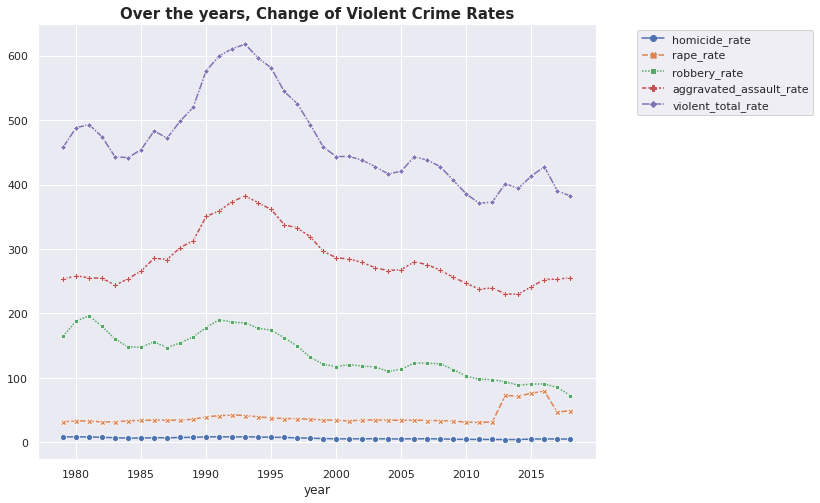

In [32]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.lineplot(data = violent_proba, markers = True)
plt.title('Over the years, Change of Violent Crime Rates', fontsize = 15, fontweight = 'bold')
plt.legend(loc = 1, bbox_to_anchor = (1.4, 1))
plt.show()

1979년부터 2018년까지 강력범죄의 발생 변동 폭은 대략 1993년을 기점으로 큰 하락세를 보였다.<br>
이후 2000년대는 비교적 작은 폭으로 범죄 발생률이 줄어들다 다시 소폭 증가하는 추세이다.<br>
근 10년 사이 변화 추이를 자세히 보고자 2009년부터 2018년의 강력범죄 발생률만을 살펴보고자 한다. 


In [33]:
violent_proba.iloc[30 : ]

,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate,violent_total_rate
year,,,,,
2009,4.77,32.96,112.87,255.93,406.53
2010,4.47,31.28,102.67,246.85,385.27
2011,4.51,30.98,97.80,237.58,370.87
2012,4.40,31.39,97.33,239.65,372.77
2013,4.31,72.86,93.89,230.28,401.34
2014,4.32,71.29,88.63,229.72,393.96
2015,5.02,76.29,90.34,241.41,413.06
2016,5.26,79.37,90.52,252.53,427.68
2017,5.23,46.69,85.16,253.21,390.30


In [34]:
violent_proba.iloc[30 : ].describe()

,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate,violent_total_rate
count,10.00,10.00,10.00,10.00,10.00
mean,4.73,52.24,93.18,244.24,394.39
std,0.37,20.65,10.76,9.96,18.02
min,4.31,30.98,72.59,229.72,370.87
25%,4.42,31.78,89.06,238.10,382.93
50%,4.64,48.02,92.20,244.13,392.13
75%,5.01,72.47,97.68,253.04,405.23
max,5.26,79.37,112.87,255.93,427.68


강력범죄 중 살인죄의 경우 인구 10만 명당 약 5건의 범죄 발생률이 나타났다.<br>
한편 강간죄는 인구 10만 명당 52건의 범죄가 발생하고 강도죄의 경우 인구 10만 명당 93건의 범죄가 발발하는 편이었다.<br>
살인죄에 비해 발생비율이 10배 이상 높았다.<br>
그 중 가장 많은 범죄율을 기록한 건 가중 폭행죄였다.<br>
다른 강력범죄보다 적게는 약 3배부터 많게는 49배나 많은 수치였다.<br>
치안이 좋은 경우 살인죄는 약 2.0건, 강간죄는 12건, 강도죄는 약 5건, 폭행죄는 127건인 것으로 보아<br> 최소 두 배 이상 높은 본 범죄 발생률은 치안이 좋지 못한 편이었다. 




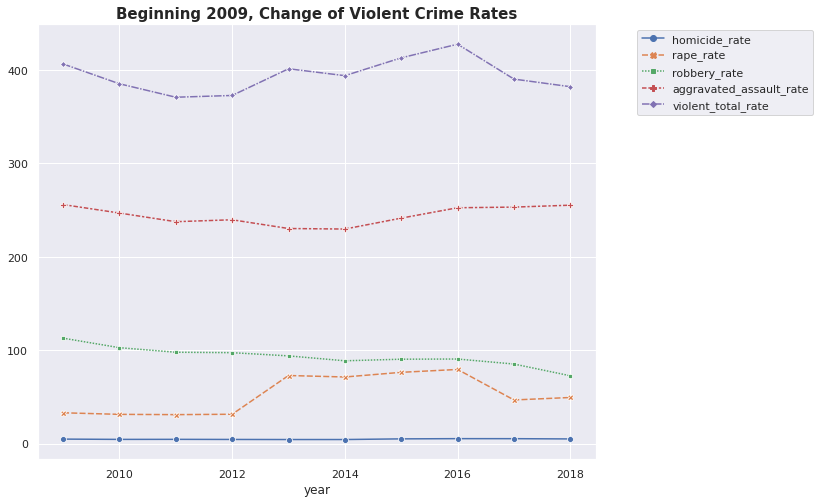

In [35]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.lineplot(data = violent_proba[30 : ], markers = True)
plt.title('Beginning 2009, Change of Violent Crime Rates', fontsize = 15, fontweight = 'bold')
plt.legend(loc = 1, bbox_to_anchor = (1.4, 1))
plt.show()

근 10년 간 강력범죄는 꾸준한 범죄율을 유지하거나 다소 증가하더라도 10년 전 범죄 발생률에 근접하게 떨어져 실질적으로 범죄가 줄어들지 않는 상태였다.<br>
10년 동안 평균적으로 비슷한 범죄가 발생하고 나아지지 못하는 상황 속, 지금과는 다른 범죄 예방 접근법이 필요하다고 판단된다.


#### **property_crime**

In [36]:
property_proba = property_crime.copy()

property_proba['burglary_rate'] = (property_proba['burglary'] / property_proba['population']) * 100000
property_proba['larceny_rate'] = (property_proba['larceny'] / property_proba['population']) * 100000
property_proba['motor_vehicle_theft_rate'] = (property_proba['motor_vehicle_theft'] / property_proba['population']) * 100000
property_proba['property_total_rate'] = property_proba['burglary_rate'] + property_proba['larceny_rate'] + property_proba['motor_vehicle_theft_rate']

In [37]:
property_proba = property_proba[['year', 'burglary_rate', 'larceny_rate', 'motor_vehicle_theft_rate', 'property_total_rate']]

In [38]:
property_proba = property_proba.groupby(by = ['year']).mean()

In [39]:
property_proba

,burglary_rate,larceny_rate,motor_vehicle_theft_rate,property_total_rate
year,,,,
1979,1385.18,3038.43,434.31,4857.92
1980,1527.02,3194.62,421.08,5142.72
1981,1500.52,3175.82,393.49,5069.83
1982,1346.36,3091.51,370.76,4808.63
1983,1214.76,2869.25,343.85,4427.85
1984,1143.71,2775.24,347.10,4266.05
1985,1166.20,2857.14,368.52,4391.86
1986,1208.91,2964.01,398.73,4571.65
1987,1196.97,3027.01,410.94,4634.92


In [40]:
property_proba.shape

(40, 4)

In [41]:
property_proba.describe()

,burglary_rate,larceny_rate,motor_vehicle_theft_rate,property_total_rate
count,40.00,40.00,40.00,40.00
mean,886.47,2585.12,362.28,3833.87
std,300.80,500.02,95.96,860.14
min,384.74,1647.06,201.67,2261.10
25%,686.42,2142.67,274.98,3104.06
50%,787.80,2689.55,382.67,3888.02
75%,1140.22,3041.33,436.86,4582.95
max,1527.02,3194.62,496.05,5142.72


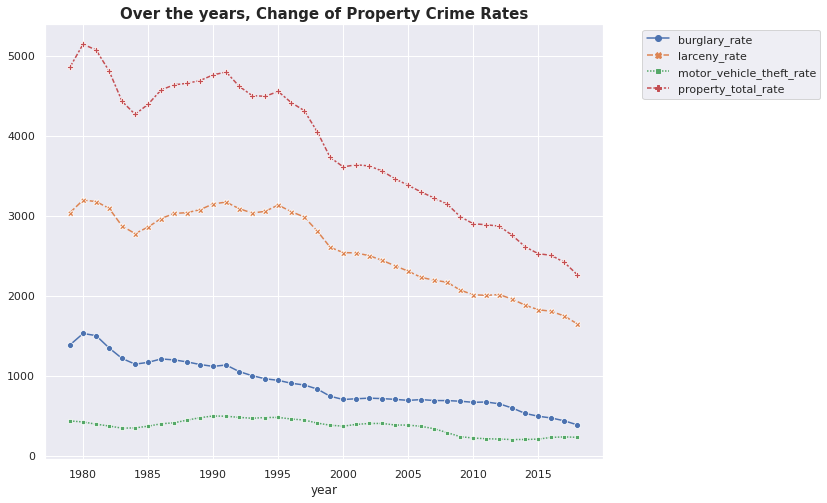

In [42]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.lineplot(data = property_proba, markers = True)
plt.title('Over the years, Change of Property Crime Rates', fontsize = 15, fontweight = 'bold')
plt.legend(loc = 1, bbox_to_anchor = (1.4, 1))
plt.show()

1979년부터 2018년까지 재산범죄는 꾸준히 감소하는 추세를 보였다.<br>
근 10년 사이 변화 추이를 자세히 보고자 2009년부터 2018년의 재산범죄 발생률만을 살펴보고자 한다. 

In [43]:
property_proba.iloc[30 : ]

,burglary_rate,larceny_rate,motor_vehicle_theft_rate,property_total_rate
year,,,,
2009,680.36,2068.71,237.75,2986.82
2010,666.92,2011.26,220.03,2898.20
2011,670.80,2003.50,211.66,2885.96
2012,647.96,2013.72,207.17,2868.85
2013,595.35,1955.80,201.67,2752.82
2014,527.32,1879.42,202.47,2609.21
2015,492.74,1824.20,207.03,2523.97
2016,470.93,1804.19,228.65,2503.76
2017,435.70,1745.36,234.69,2415.75


In [44]:
property_proba.iloc[30 : ].describe()

,burglary_rate,larceny_rate,motor_vehicle_theft_rate,property_total_rate
count,10.00,10.00,10.00,10.00
mean,557.28,1895.32,218.04,2670.64
std,108.93,137.69,13.74,242.67
min,384.74,1647.06,201.67,2261.10
25%,476.38,1809.19,207.07,2508.82
50%,561.34,1917.61,215.84,2681.02
75%,662.18,2009.32,229.13,2881.68
max,680.36,2068.71,237.75,2986.82


재산범죄 중 주거 침입 절도죄의 경우 인구 10만 명당 약 557건의 범죄 발생률을 보였다.<br>
그에 비해 절도죄는 인구 10만 명당 1895건의 범죄가 발생하고 차량 절도죄의 경우 인구 10만 명당 218건의 범죄가 발발하는 편이었다.<br>
상대적으로 주거에 침입하거나 차량을 절도하는 것에 쉬운 절도죄의 범죄율이 가장 높았다.<br>
비교적 치안이 좋은 경우 주거 침입 절도죄는 약 72건, 절도죄는 592건, 차량 절도죄는 12건인 것에 비해 굉장히 높은 수치였다.<br>




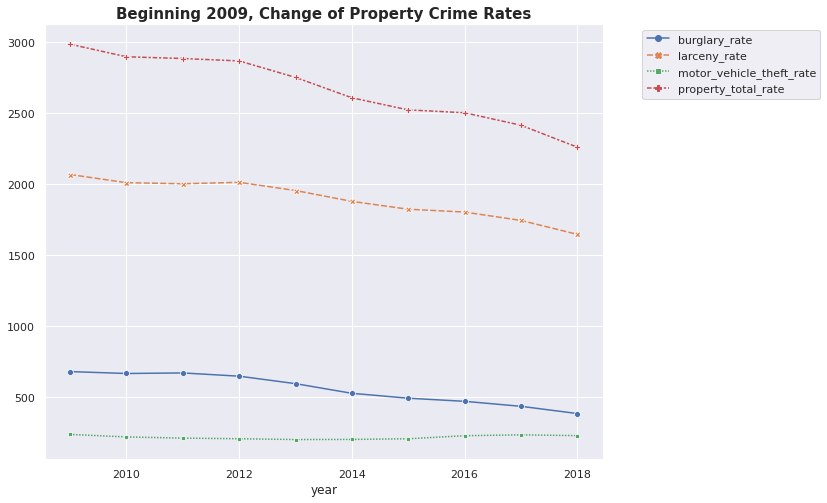

In [45]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.lineplot(data = property_proba[30 : ], markers = True)
plt.title('Beginning 2009, Change of Property Crime Rates', fontsize = 15, fontweight = 'bold')
plt.legend(loc = 1, bbox_to_anchor = (1.4, 1))
plt.show()

근 10년 역시 재산범죄는 차랑 절도죄를 제외하고 지속적으로 범죄율이 떨어지고 있었다.<br>
그러나 이전 범죄 발생률이 워낙 큰 나머지 꾸준히 줄어든 범죄율에도 불구하고 여전히 높은 범죄 발생률을 보이고 있었다.<br> 
아직까지도 높은 재산범죄율로 치안을 어지럽히는 현 상황을 타파하기 위해 지금과는 다른 범죄 예방 접근법이 필요하다고 판단된다.


### **2. 인구 수와 범죄 발생 간 상관관계 파악**
- scatter plot(산점도) 및 피어슨 상관계수 검증
 - violent crime의 경우
 - property crime의 경우
 

#### **violent_crime**

In [46]:
violent_crime = violent_crime[violent_crime['year'] >= 2009]
violent_crime = violent_crime.reset_index(drop = True)

In [47]:
violent_crime

,year,population,homicide,rape,robbery,aggravated_assault
0,2009,698473,22,513,654,3235
1,2009,4708708,322,1504,6265,13103
2,2009,2889450,179,1378,2576,10772
3,2009,6595778,380,2279,8199,17270
4,2009,36961664,1972,8713,64093,100156
...,...,...,...,...,...,...
505,2018,624358,11,326,73,745
506,2018,7523869,236,3610,5557,14316
507,2018,5807406,175,2333,3493,11364
508,2018,1804291,76,716,333,4286


In [48]:
violent_crime.shape

(510, 6)

인구 수가 많아질수록 강력범죄는 증가하는 경향을 보일까?<br>
이를 알아보기 위해 두 변수의 산점도를 그려보았다.

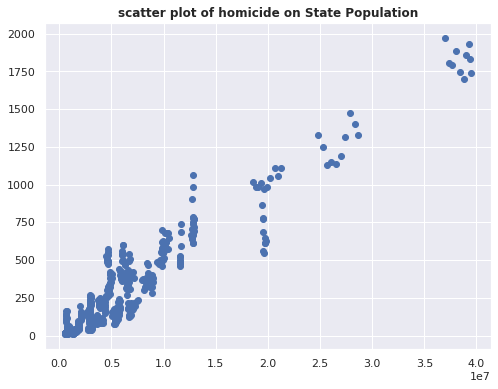

In [49]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = violent_crime['population'], y = violent_crime['homicide'])
plt.title('scatter plot of homicide on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

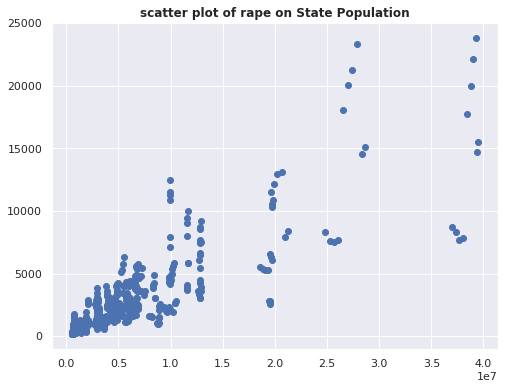

In [50]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = violent_crime['population'], y = violent_crime['rape'])
plt.title('scatter plot of rape on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

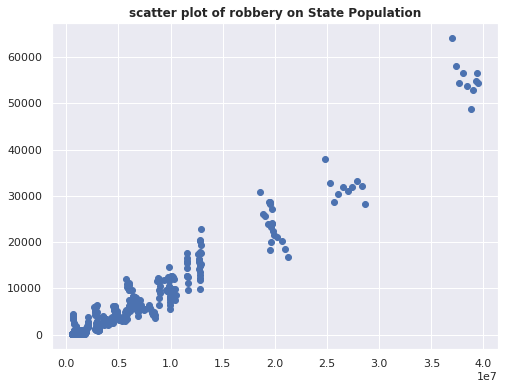

In [51]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = violent_crime['population'], y = violent_crime['robbery'])
plt.title('scatter plot of robbery on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

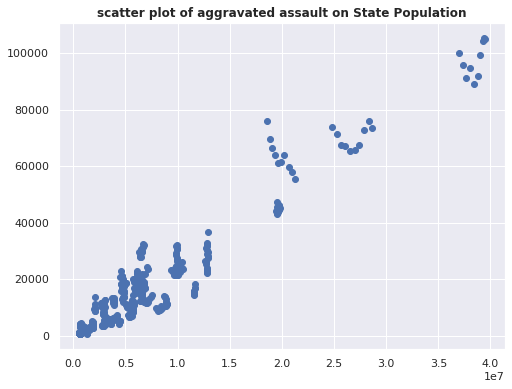

In [52]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = violent_crime['population'], y = violent_crime['aggravated_assault'])
plt.title('scatter plot of aggravated assault on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

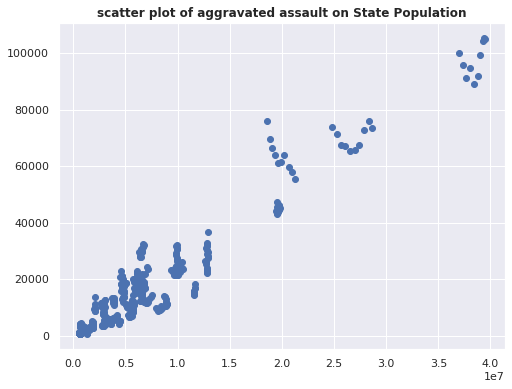

In [53]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = violent_crime['population'], y = violent_crime['aggravated_assault'])
plt.title('scatter plot of aggravated assault on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

상관관계의 정도를 파악하기 위해 scipy.stats의 pearson correlation coefficient를 계산하겠다.

In [54]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 살인죄 발생은 상관관계가 없다.
### H1 = 인구 수와 살인죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(violent_crime['population'], violent_crime['homicide'])

(0.9516744239884377, 1.3021398247833433e-262)

pearson을 통해 상관계수 및 p값을 계산해본 결과<br>
상관계수는 0.95, p값은 0.05보다 현저히 작은 것을 확인할 수 있다.<br>
따라서 인구 수와 살인죄는 통계적으로 유의미하게 매우 강한 상관관계를 보였다.

In [55]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 강간죄 발생은 상관관계가 없다.
### H1 = 인구 수와 강간죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(violent_crime['population'], violent_crime['rape'])

(0.8394775043241589, 1.1559709851074217e-136)

In [56]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 강도죄 발생은 상관관계가 없다.
### H1 = 인구 수와 강도죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(violent_crime['population'], violent_crime['robbery'])

(0.970205411876353, 6.290667565e-315)

In [57]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 가중 폭행죄 발생은 상관관계가 없다.
### H1 = 인구 수와 가중 폭행죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(violent_crime['population'], violent_crime['aggravated_assault'])

(0.9574597658127745, 2.3591071234275036e-276)

다음은 직관적으로 강력범죄의 각 유형과 인구 수의 상관관계를 시각화하여 살펴보고자 한다.

In [58]:
violent_corr = violent_crime.corr()
violent_corr

,year,population,homicide,rape,robbery,aggravated_assault
year,1.00,0.02,0.04,0.19,-0.06,0.01
population,0.02,1.00,0.95,0.84,0.97,0.96
homicide,0.04,0.95,1.00,0.81,0.94,0.95
rape,0.19,0.84,0.81,1.00,0.77,0.81
robbery,-0.06,0.97,0.94,0.77,1.00,0.95
aggravated_assault,0.01,0.96,0.95,0.81,0.95,1.00


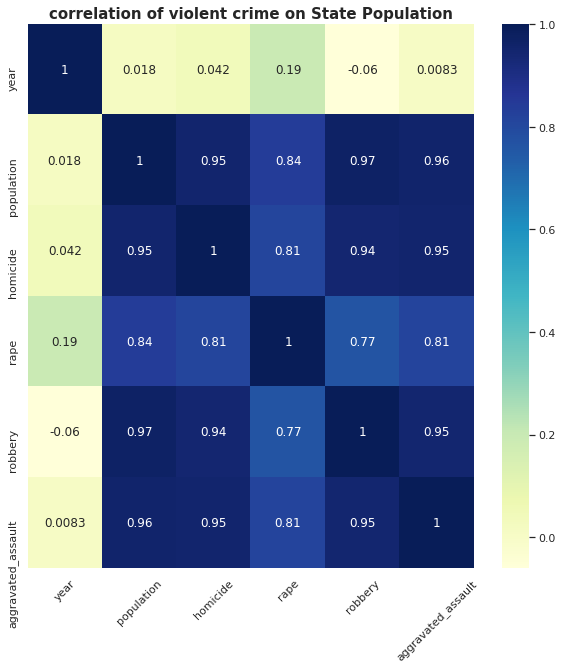

In [59]:
### correlation diagram on violent crime

plt.figure(figsize = (10, 10))
violent_corr = sns.heatmap(violent_corr, annot = True, cmap='YlGnBu')
plt.xticks(rotation=45)
plt.title('correlation of violent crime on State Population', fontsize = 15, fontweight = 'bold')
plt.show()

#### **property_crime**

In [60]:
property_crime = property_crime[property_crime['year'] >= 2009]
property_crime = property_crime.reset_index(drop = True)

In [61]:
property_crime

,year,population,burglary,larceny,motor_vehicle_theft
0,2009,698473,3600,15251,1687
1,2009,4708708,48844,118072,11091
2,2009,2889450,34753,68228,6097
3,2009,6595778,54308,155976,26437
4,2009,36961664,230198,615402,163833
...,...,...,...,...,...
505,2018,624358,1496,6451,264
506,2018,7523869,40434,154941,27881
507,2018,5807406,14180,68380,8678
508,2018,1804291,5916,19783,2189


In [62]:
property_crime.shape

(510, 5)

인구 수가 많아질수록 재산범죄도 증가하는 경향을 보일까?<br>
이를 알아보기 위해 두 변수의 산점도를 그려보았다.

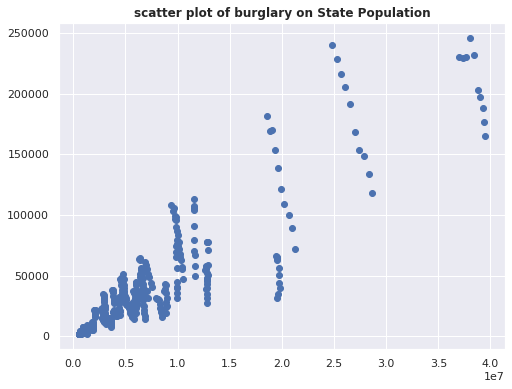

In [63]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = property_crime['population'], y = property_crime['burglary'])
plt.title('scatter plot of burglary on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

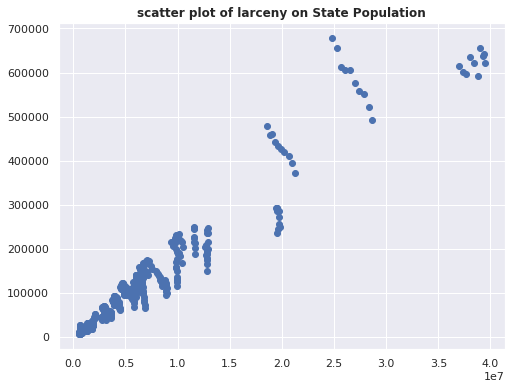

In [64]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = property_crime['population'], y = property_crime['larceny'])
plt.title('scatter plot of larceny on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

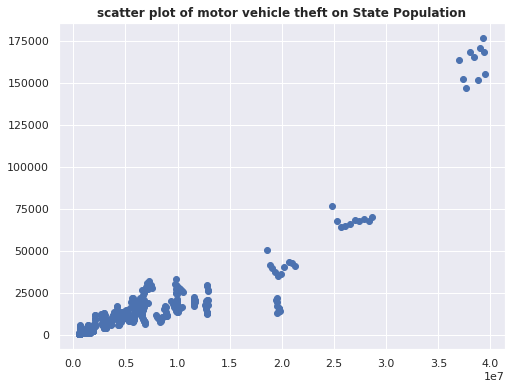

In [65]:
### scatter plot

plt.figure(figsize=(8,6))
plt.scatter(x = property_crime['population'], y = property_crime['motor_vehicle_theft'])
plt.title('scatter plot of motor vehicle theft on State Population', fontsize = 12, fontweight = 'bold')
plt.show()

상관관계의 정도를 파악하기 위해 scipy.stats의 pearson correlation coefficient를 계산하겠다.

In [66]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 주거 침입 절도죄 발생은 상관관계가 없다.
### H1 = 인구 수와 주거 침입 절도죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(property_crime['population'], property_crime['burglary'])

(0.900943530354245, 2.548726472785862e-186)

pearson을 통해 상관계수 및 p값을 계산해본 결과<br>
상관계수는 0.90, p값은 0.05보다 현저히 작은 것을 확인할 수 있다.<br>
따라서 인구 수와 주거 침입 절도죄는 통계적으로 유의미하게 매우 강한 상관관계를 보였다.

In [67]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 절도죄 발생은 상관관계가 없다.
### H1 = 인구 수와 절도죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(property_crime['population'], property_crime['larceny'])

(0.9655062425208781, 4.92686293939312e-299)

In [68]:
### pearson correlation coefficient and the p-value for testing non-correlation
### H0 = 인구 수와 차량 절도죄 발생은 상관관계가 없다.
### H1 = 인구 수와 차량 절도죄 발생은 상관관계가 있다.
### 임계치 0.05를 기준으로 p-value를 살펴봄

scipy.stats.pearsonr(property_crime['population'], property_crime['motor_vehicle_theft'])

(0.8908940689119312, 3.059845098500083e-176)

다음은 직관적으로 강력범죄의 각 유형과 인구 수의 상관관계를 시각화하여 살펴보고자 한다.

In [69]:
property_corr = property_crime.corr()
property_corr

,year,population,burglary,larceny,motor_vehicle_theft
year,1.00,0.02,-0.15,-0.05,0.00
population,0.02,1.00,0.90,0.97,0.89
burglary,-0.15,0.90,1.00,0.96,0.86
larceny,-0.05,0.97,0.96,1.00,0.87
motor_vehicle_theft,0.00,0.89,0.86,0.87,1.00


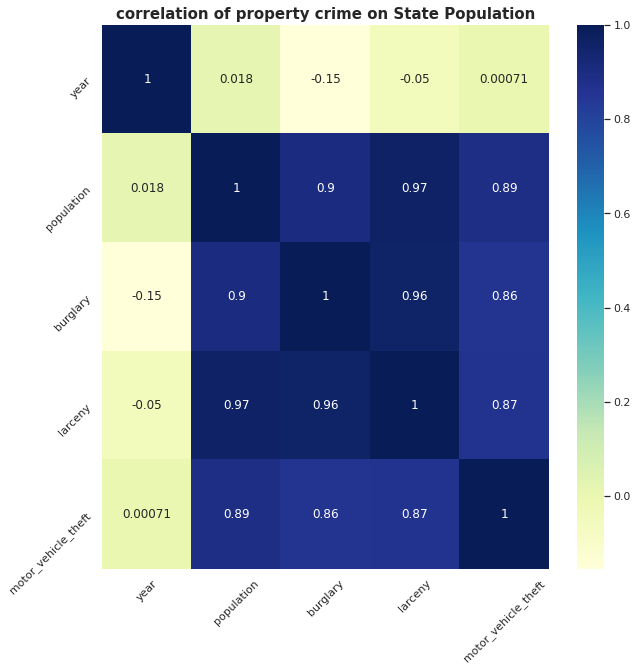

In [70]:
### correlation diagram on property crime

plt.figure(figsize = (10, 10))
property_corr = sns.heatmap(property_corr, annot = True, cmap='YlGnBu')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('correlation of property crime on State Population', fontsize = 15, fontweight = 'bold')
plt.show()

인구 수와 범죄 발생은 강한 양의 상관관계가 존재했다.<br>
다시 말해 인구 수가 많아질수록 범죄의 발생 역시 증가하는 추세를 보였다는 것이다.<br>
그러나 인구 수와 범죄 발생 간 어느 변수가 다른 변수의 원인이 되는 것인지는 또 다른 문제다.<br>
과연 인구 수는 범죄 발생에 있어 상관관계를 넘어 인과관계를 가질까?

### **3. 인구 수에 따른 범죄 발생률 인과관계 여부 분석**
- 회귀분석(regression)<br>
 - statsmodel의 ols 적용
 - 변수의 정규성: KDE(Kernel Density Estimation)
 - 변수의 선형 상관성: regplot  
 - 변수의 독립성: DW 검정(Durbin-Watson)
 
- 인구 수에 가장 큰 영향을 받는 형법 범죄 확인


#### **violent_crime**

강력범죄의 회귀분석에 앞서 10년 간 집계된 살인죄, 강간죄, 강도죄 및 가중 폭행죄의 데이터 분포를 확인하고자 한다.<br>


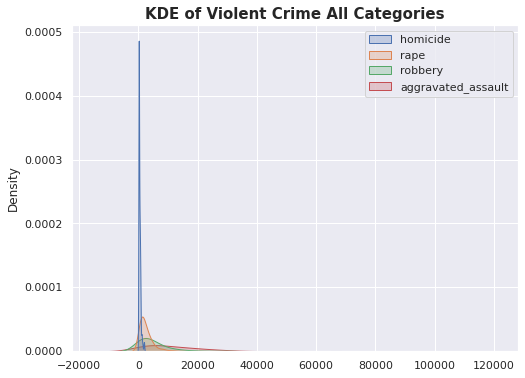

In [71]:
### KDE of Violent Crime All Categories

plt.figure(figsize=(8,6))
sns.kdeplot(data = violent_crime[['homicide',	'rape',	'robbery',	'aggravated_assault']], shade = True)

plt.title('KDE of Violent Crime All Categories', fontsize = 15, fontweight = 'bold')
plt.show()

In [72]:
violent_crime.describe()

,year,population,homicide,rape,robbery,aggravated_assault
count,510.00,510.00,510.00,510.00,510.00,510.00
mean,2013.50,6222248.67,304.07,2880.50,6702.81,15205.87
std,2.88,7014227.18,352.72,3458.82,9689.22,18571.17
min,2009.00,544270.00,7.00,131.00,53.00,444.00
25%,2011.00,1689745.50,52.00,884.75,1031.25,3522.25
50%,2013.50,4406100.00,174.00,1812.00,3658.00,10113.00
75%,2016.00,6957467.00,421.50,3478.00,7374.00,18561.00
max,2018.00,39461588.00,1972.00,23834.00,64093.00,105418.00


강력범죄의 경우 압도적으로 가장 작은 표준편차를 가진 것은 살인죄였다.<br>
살인죄 대부분이 평균에 집중되어 있었기 때문이다.<br>
강간죄는 살인죄의 표준편차보다 9배나 큰 폭의 편차를 가지고 있었다.<br>



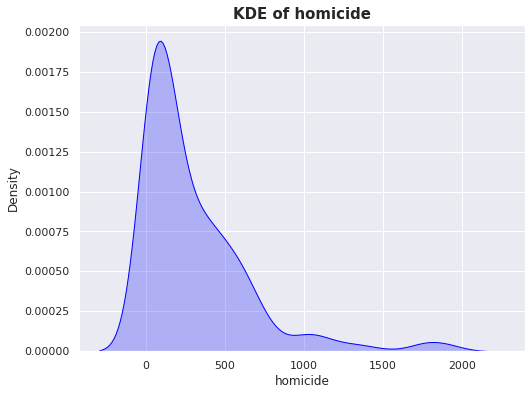

In [73]:
### KDE of Homicide

plt.figure(figsize=(8,6))
sns.kdeplot(data = violent_crime, x = 'homicide', color = 'blue', shade = True)

plt.title('KDE of homicide', fontsize = 15, fontweight = 'bold')
plt.show()

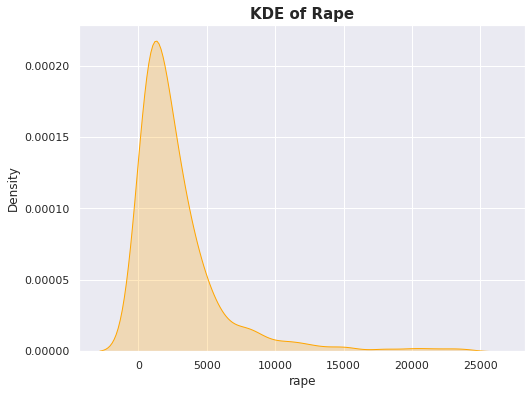

In [74]:
### KDE of Rape

plt.figure(figsize=(8,6))
sns.kdeplot(data = violent_crime, x = 'rape', color = 'orange', shade = True)

plt.title('KDE of Rape', fontsize = 15, fontweight = 'bold')
plt.show()

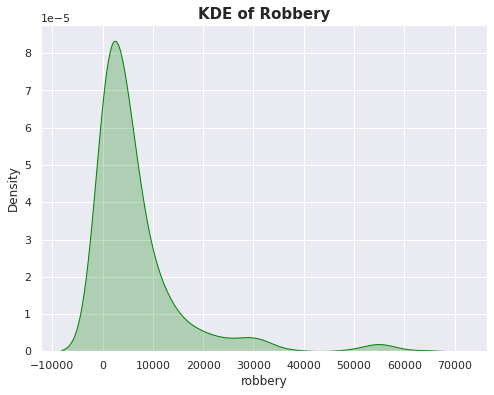

In [75]:
### KDE of Robbery

plt.figure(figsize=(8,6))
sns.kdeplot(data = violent_crime, x = 'robbery', color = 'green', shade = True)

plt.title('KDE of Robbery', fontsize = 15, fontweight = 'bold')
plt.show()

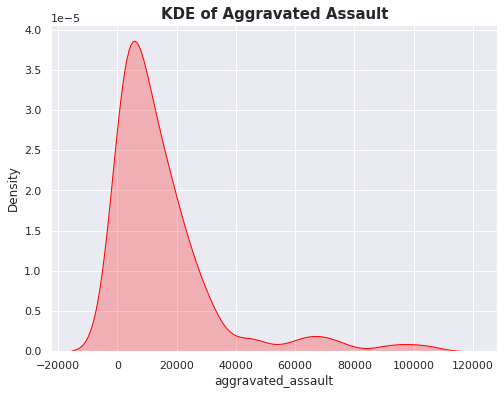

In [76]:
### KDE of Aggravated Assault

plt.figure(figsize=(8,6))
sns.kdeplot(data = violent_crime, x = 'aggravated_assault', color = 'red', shade = True)

plt.title('KDE of Aggravated Assault', fontsize = 15, fontweight = 'bold')
plt.show()

다음은 본격적으로 인구 수에 따른 각 범죄 발생률의 인과관계 여부를 분석하고자 한다.

독립변수는 오직 인구 수 하나이기 때문에 단순 회귀 분석 모델인 OLS로 진행하였다. 

(1) 살인죄

In [77]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): homicide

ols_model = ols('homicide ~ population', data = violent_crime)
homicide_fit = ols_model.fit()

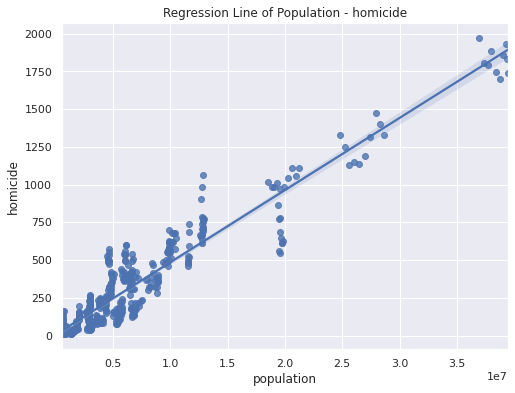

In [78]:
### seaborn regplot: homicide

plt.figure(figsize=(8,6))
sns.regplot(x = violent_crime['population'], y = violent_crime['homicide'])
plt.title('Regression Line of Population - homicide')
plt.show()

In [79]:
print(homicide_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               homicide   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     4878.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          1.30e-262
Time:                        11:43:19   Log-Likelihood:                -3112.6
No. Observations:                 510   AIC:                             6229.
Df Residuals:                     508   BIC:                             6238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2942      6.421      0.980      0.3

OLS 단일 회귀 모델 분석 결과, 살인죄 = 0.00004786 * 인구 수 + 6.2942 식이 도출되었다.<br>
인구가 10만 명씩 늘어날수록 약 5건 가량 살인죄가 증가하고 있었다.<br>
절편의 경우 유의수준보다 큰 값을 지녀 통계적으로 유의미하지 않았지만<br>
결정계수는 유의수준보다 작아 인구 수가 증가할 때마다 살인죄가 0.00004786씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 살인죄의 분산을 인구 수가 90%나 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.<br>
또한 DW 검정값이 2.354이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

(2) 강간죄

In [80]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): rape

ols_model = ols('rape ~ population', data = violent_crime)
rape_fit = ols_model.fit()

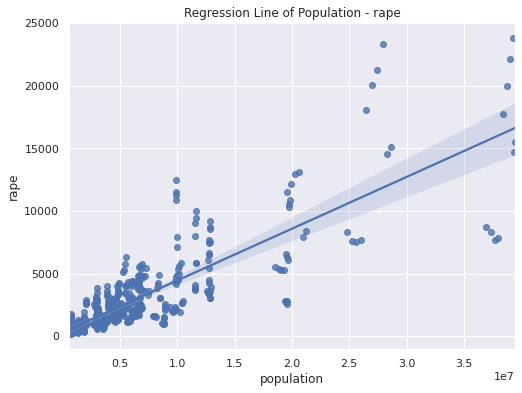

In [81]:
### seaborn regplot: rape

plt.figure(figsize=(8,6))
sns.regplot(x = violent_crime['population'], y = violent_crime['rape'])
plt.title('Regression Line of Population - rape')
plt.show()

In [82]:
print(rape_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   rape   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1212.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          1.16e-136
Time:                        11:43:20   Log-Likelihood:                -4567.9
No. Observations:                 510   AIC:                             9140.
Df Residuals:                     508   BIC:                             9148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    304.7440    111.411      2.735      0.0

OLS 단일 회귀 모델 분석 결과, 강간죄 = 0.0004 * 인구 수 + 304.7440 식이 도출되었다.<br>
인구가 10만 명씩 늘어날수록 약 40건 가량 강간죄가 증가하고 있었다.<br>
절편의 경우 유의수준보다 큰 값을 지녀 통계적으로 유의미하지 않았지만<br>
결정계수는 유의수준보다 작아 인구 수가 증가할 때마다 강간죄가 0.0004씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 강간죄의 분산을 인구 수가 약 70%를 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.<br>
또한 DW 검정값이 1.350이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

(3) 강도죄

In [83]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): robbery

ols_model = ols('robbery ~ population', data = violent_crime)
robbery_fit = ols_model.fit()

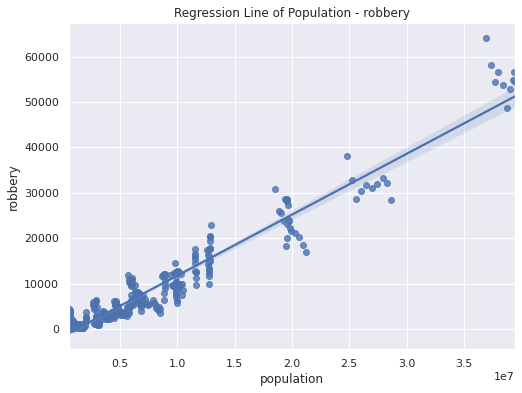

In [84]:
### seaborn regplot: robbery

plt.figure(figsize=(8,6))
sns.regplot(x = violent_crime['population'], y = violent_crime['robbery'])
plt.title('Regression Line of Population - robbery')
plt.show()

In [85]:
print(robbery_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                robbery   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     8146.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          6.29e-315
Time:                        11:43:20   Log-Likelihood:                -4681.3
No. Observations:                 510   AIC:                             9367.
Df Residuals:                     508   BIC:                             9375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1636.3110    139.154    -11.759      0.0

OLS 단일 회귀 모델 분석 결과, 강도죄 = 0.0013 * 인구 수 - 1636.3110 식이 도출되었다.<br>
인구가 10만 명씩 늘어날수록 약 130건 가량 강도죄가 증가하고 있었다.<br>
절편 및 결정계수 모두 유의수준보다 작아 통계적으로 유의미했다.<br>
즉 인구 수가 증가할 때마다 강도죄가 0.0013씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 강도죄의 분산을 인구 수가 약 94%나 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.<br>
또한 DW 검정값이 1.824이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

(4) 가중 폭행죄

In [86]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): aggravated_assault

ols_model = ols('aggravated_assault ~ population', data = violent_crime)
aggravated_assault_fit = ols_model.fit()

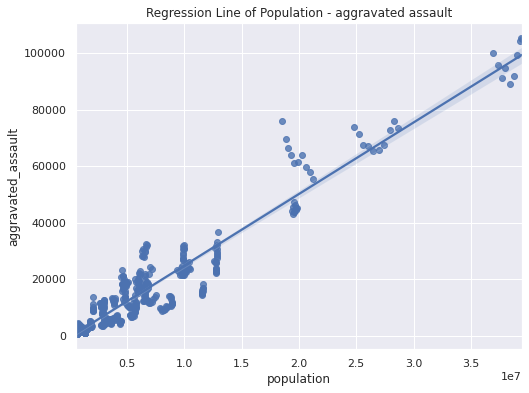

In [87]:
### seaborn regplot: aggravated_assault

plt.figure(figsize=(8,6))
sns.regplot(x = violent_crime['population'], y = violent_crime['aggravated_assault'])
plt.title('Regression Line of Population - aggravated assault')
plt.show()

In [88]:
print(aggravated_assault_fit.summary())

                            OLS Regression Results                            
Dep. Variable:     aggravated_assault   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     5593.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          2.36e-276
Time:                        11:43:21   Log-Likelihood:                -5102.3
No. Observations:                 510   AIC:                         1.021e+04
Df Residuals:                     508   BIC:                         1.022e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -567.5999    317.665     -1.787      0.0

OLS 단일 회귀 모델 분석 결과, 가중 폭행죄 = 0.0025 * 인구 수 - 567.5999 식이 도출되었다.<br>
인구가 10만 명씩 늘어날수록 약 250건 가량 가중 폭행죄가 증가하고 있었다.<br>
절편의 경우 유의수준보다 큰 값을 지녀 통계적으로 유의미하지 않았지만<br>
결정계수는 유의수준보다 작아 인구 수가 증가할 때마다 가중 폭행죄가 0.0025씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 가중 폭행죄의 분산을 인구 수가 약 91%나 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.<br>
또한 DW 검정값이 1.951이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

#### **property_crime**

재산범죄의 회귀분석에 앞서 10년 간 집계된 주거 침입 절도죄, 절도죄, 차량 절도죄의 데이터 분포를 확인하고자 한다.<br>


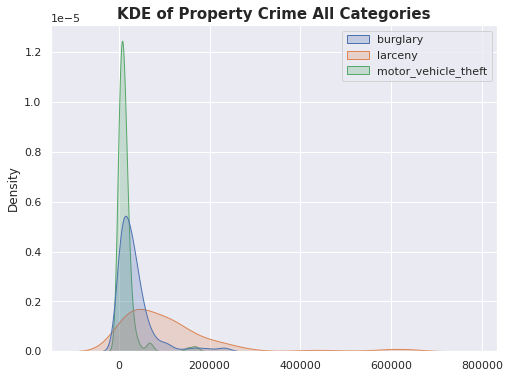

In [89]:
### KDE of Property Crime All Categories

plt.figure(figsize=(8,6))
sns.kdeplot(data = property_crime[['burglary',	'larceny',	'motor_vehicle_theft']], shade = True)

plt.title('KDE of Property Crime All Categories', fontsize = 15, fontweight = 'bold')
plt.show()

In [90]:
property_crime.describe()

,year,population,burglary,larceny,motor_vehicle_theft
count,510.00,510.00,510.00,510.00,510.00
mean,2013.50,6222248.67,35388.55,115303.28,14445.49
std,2.88,7014227.18,42679.43,128149.37,23963.81
min,2009.00,544270.00,1496.00,6451.00,184.00
25%,2011.00,1689745.50,7551.75,28471.50,3816.25
50%,2013.50,4406100.00,23489.50,83351.50,9468.00
75%,2016.00,6957467.00,43117.00,140604.00,15498.75
max,2018.00,39461588.00,245767.00,678455.00,176756.00


재산범죄의 경우 압도적으로 가장 작은 표준편차를 보인 것은 차량 절도죄였다.<br>
차량 절도죄는 다른 재산범죄에 비해 평균으로 집중되어 인구 수에 따라 범죄 발생 변화 폭이 적은 편이었다.<br>


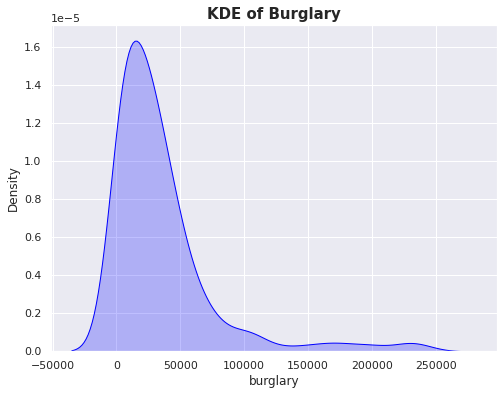

In [91]:
### KDE of Burglary

plt.figure(figsize=(8,6))
sns.kdeplot(data = property_crime, x = 'burglary', color = 'blue', shade = True)

plt.title('KDE of Burglary', fontsize = 15, fontweight = 'bold')
plt.show()

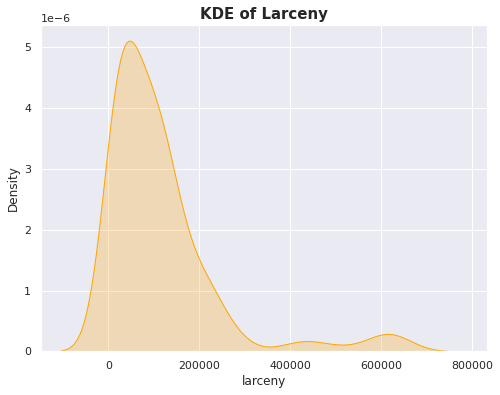

In [92]:
### KDE of Larceny

plt.figure(figsize=(8,6))
sns.kdeplot(data = property_crime, x = 'larceny', color = 'orange', shade = True)

plt.title('KDE of Larceny', fontsize = 15, fontweight = 'bold')
plt.show()

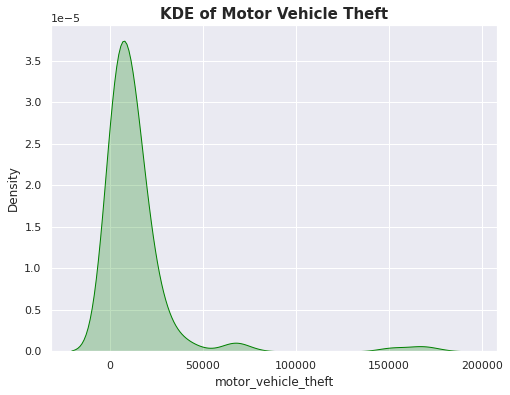

In [93]:
### KDE of Motor Vehicle Theft

plt.figure(figsize=(8,6))
sns.kdeplot(data = property_crime, x = 'motor_vehicle_theft', color = 'green', shade = True)

plt.title('KDE of Motor Vehicle Theft', fontsize = 15, fontweight = 'bold')
plt.show()

(1) 주거 침입 절도죄

In [94]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): burglary

ols_model2 = ols('burglary ~ population', data = property_crime)
burglary_fit = ols_model2.fit()

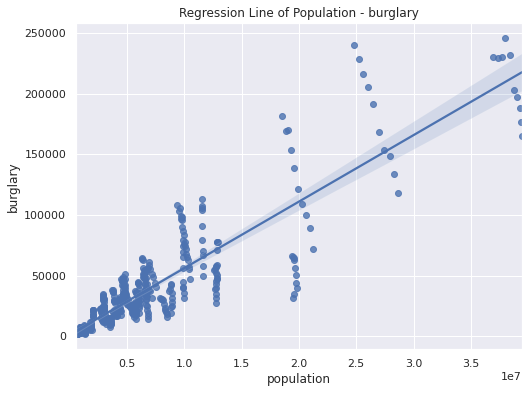

In [95]:
### seaborn regplot: burglary 

plt.figure(figsize=(8,6))
sns.regplot(x = property_crime['population'], y = property_crime['burglary'])
plt.title('Regression Line of Population - burglary')
plt.show()

In [96]:
print(burglary_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               burglary   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     2190.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          2.55e-186
Time:                        11:43:23   Log-Likelihood:                -5734.7
No. Observations:                 510   AIC:                         1.147e+04
Df Residuals:                     508   BIC:                         1.148e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1278.3960   1097.812      1.164      0.2

OLS 단일 회귀 모델 분석 결과, 주거 침입 절도죄 = 0.0055 * 인구 수 + 1278.3960 식이 도출되었다.<br>
인구가 10만 명씩 늘어날수록 약 550건 가량 주거 침입 절도죄가 증가하고 있었다.<br>
절편의 경우 유의수준보다 큰 값을 지녀 통계적으로 유의미하지 않았지만<br>
결정계수는 유의수준보다 작아 인구 수가 증가할 때마다 주거 침입 절도죄가 0.0055씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 살인죄의 분산을 인구 수가 약 81%를 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.<br>
또한 DW 검정값이 1.716이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

(2) 절도죄

In [97]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): larceny

ols_model2 = ols('larceny ~ population', data = property_crime)
larceny_fit = ols_model2.fit()

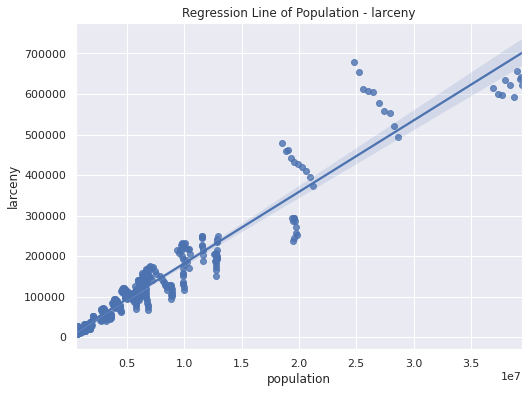

In [98]:
### seaborn regplot: larceny 

plt.figure(figsize=(8,6))
sns.regplot(x = property_crime['population'], y = property_crime['larceny'])
plt.title('Regression Line of Population - larceny')
plt.show()

In [99]:
print(larceny_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                larceny   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     6985.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          4.93e-299
Time:                        11:43:23   Log-Likelihood:                -6035.0
No. Observations:                 510   AIC:                         1.207e+04
Df Residuals:                     508   BIC:                         1.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5544.5484   1977.913      2.803      0.0

OLS 단일 회귀 모델 분석 결과, 절도죄 = 0.0176 * 인구 수 + 220.427 식이 도출되었다.<br>
인구가 10만 명씩 늘어날수록 약 1770건 가량 절도죄가 증가하고 있었다.<br>
결정계수는 유의수준보다 작아 인구 수가 증가할 때마다 절도죄가 0.0177씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 살인죄의 분산을 인구 수가 약 93%나 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.<br>
또한 DW 검정값이 1.791이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

(3) 차량 절도죄

In [100]:
### Simple Linear Regression Stats model used by OLS(Ordinary Least Square): motor_vehicle_theft

ols_model2 = ols('motor_vehicle_theft ~ population', data = property_crime)
motor_vehicle_theft_fit = ols_model2.fit()

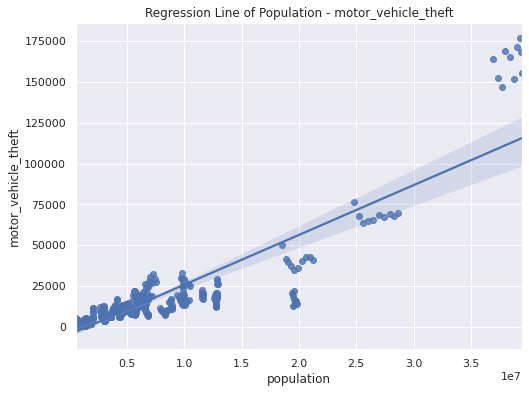

In [101]:
### seaborn regplot: motor_vehicle_theft 

plt.figure(figsize=(8,6))
sns.regplot(x = property_crime['population'], y = property_crime['motor_vehicle_theft'])
plt.title('Regression Line of Population - motor_vehicle_theft')
plt.show()

In [102]:
print(motor_vehicle_theft_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     motor_vehicle_theft   R-squared:                       0.794
Model:                             OLS   Adj. R-squared:                  0.793
Method:                  Least Squares   F-statistic:                     1954.
Date:                 Fri, 13 Aug 2021   Prob (F-statistic):          3.06e-176
Time:                         11:43:24   Log-Likelihood:                -5463.7
No. Observations:                  510   AIC:                         1.093e+04
Df Residuals:                      508   BIC:                         1.094e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4493.1723    645.204     -6.96

OLS 단일 회귀 모델 분석 결과, 차량 절도죄 = 0.0030 * 인구 수 - 4493.1723 식이 도출되었다.<br>
인구가 10만 명씩 늘어날수록 약 300건 가량 차량 절도죄가 증가하고 있었다.<br>
절편 및 결정계수는 유의수준보다 작아 통계적으로 유의미했다.<br>
즉 인구 수가 증가할 때마다 차량 절도죄가 0.0030씩 증가한다는 건 통계적으로 유의미한 예측이었다.<br> 
본 모델의 R 제곱값을 통해 살인죄의 분산을 인구 수가 약 79%로 설명하고 있었다.<br>
F-통계량 값이 유의수준보다 한참 작은 것으로 보아 본 모델은 집계된 해당 데이터뿐만 아니라 모집단에서도 유의미한 것임을 확인할 수 있었다.<br>
또한 DW 검정값이 1.952이므로 잔차 간 자기 상관성이 존재하지 않아 계산된 R 제곱값, F-통계량, 결정계수 등의 통계가 왜곡되지 않았음을 알 수 있다.

지금까지 OLS 단일 회귀 모델을 통해 인구 10만명 당 발발하는 형법 범죄 발생 건수를 살펴보았다.<br>
각 형법 범죄 별 인구 수에 가장 큰 영향을 받는 형법 범죄는 아래와 같이 정리 된다.<br>
<br>
1) 살인죄<br>
인구 10만명 당 **약 5건의 살인죄** 발발, 인구 수는 살인죄의 분산을 **약 90% 설명**<br>
<br>
2) 강간죄<br>
인구 10만명 당 **약 40건의 강간죄** 발발, 인구 수는 강간죄의 분산을 **약 70% 설명**<br>
<br>
3) 강도죄<br>
인구 10만명 당 **약 130건의 강도죄** 발발, 인구 수는 강도죄의 분산을 **약 94% 설명**<br>
<br>
4) 가중 폭행죄<br>
인구 10만명 당 **약 250건의 가중 폭행죄** 발발, 인구 수는 가중 폭행죄의 분산을 **약 91% 설명**<br>
<br>
5) 주거 침입 절도죄<br>
인구 10만명 당 **약 550건의 주거 침입 절도죄** 발발, 인구 수는 주거 침입 절도죄의 분산을 **약 81% 설명**<br>
<br>
6) 절도죄<br>
인구 10만명 당 **약 1770건의 절도죄** 발발, 인구 수는 절도죄의 분산을 **약 93% 설명**<br>
<br>
7) 차량 절도죄<br>
인구 10만명 당 **약 300건의 차량 절도죄** 발발, 인구 수는 차량 절도죄의 분산을 **약 79% 설명**<br>



따라서 인구 10만명 당 가장 큰 폭으로 발생하는 형법 범죄는 재산 범죄 중 절도죄로 확인된다.<br>
한편 강력범죄 및 재산범죄 중 살인죄, 강도죄, 가중 폭행죄, 절도죄의 경우 모두 인구 수만으로 90% 이상 설명된다는 점은 흥미로운 결과였다.<br>


### **4. 2019년 인구 수를 통한 형법 범죄 발생 건수 예측**
- 최적의 모델 구현
  - sklearn의 LinearRegression 적용
  - sklearn의 DecisionTreeRegressor, RandomForestRegressor 적용
  - sklearn의 GradientBoostingRegressor 적용
  - 모델 예측 정확도 목표 = 90 이상

2009년부터 2018년 간 집계된 데이터를 단순 선형 회귀 모델을 통해 분석한 결과,<br>
인구 수는 강력범죄 및 재산범죄를 예측하는 데 유의미한 변수임을 파악할 수 있었다.<br>
따라서 2009년부터 2018년 간 데이터를 학습한 모델을 바탕으로 2019년의 인구 수를 통해 각 범죄를 예측해보고자 한다.

In [103]:
df_test.head()

,year,population,homicide,rape,robbery,aggravated_assault,burglary,larceny,motor_vehicle_theft
0,2019,731545,69,1088,826,4360,3563,15114,2617
1,2019,4903185,358,2068,3941,18679,26079,92477,12577
2,2019,3017804,242,2331,1557,13513,18095,60735,7420
3,2019,7278717,365,3662,6410,22704,28699,130788,18151
4,2019,39512223,1690,14799,52301,105541,152555,626802,141757


In [104]:
df_test.describe()

,year,population,homicide,rape,robbery,aggravated_assault,burglary,larceny,motor_vehicle_theft
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,2019.00,6436069.08,322.06,2741.47,5254.67,16101.61,21915.61,99727.37,14154.61
std,0.00,7360660.47,355.15,3082.43,8564.03,19392.77,26944.92,117333.95,21980.67
min,2019.00,578759.00,11.00,278.00,67.00,824.00,1275.00,6984.00,298.00
25%,2019.00,1789606.00,64.50,768.00,844.50,3960.50,5042.50,28139.50,3801.00
50%,2019.00,4467673.00,198.00,2068.00,2991.00,10987.00,15510.00,65620.00,10269.00
75%,2019.00,7446805.00,518.00,2919.50,5540.00,19629.50,27189.50,115252.00,16464.50
max,2019.00,39512223.00,1690.00,14824.00,52301.00,105541.00,152555.00,626802.00,141757.00


적용될 모델은 아래와 같다.<br>
- LinearRegression<br>
- DecisionTreeRegressor<br>
- RandomForestRegressor<br>
- GradientBoostingRegressor<br>

In [105]:
reg_model = LinearRegression(n_jobs = -1)   ### LinearRegression Model
dtr_model = DecisionTreeRegressor(random_state = 74)   ### DecisionTreeRegressor Model
rfr_model = RandomForestRegressor(random_state = 74, n_jobs = -1)   ### RandomForestRegressor Model
gbr_model = GradientBoostingRegressor(random_state = 74)   ### GradientBoostingRegressor Model

#### **1) 살인죄**

In [106]:
### homicide

feature = ['population']
target = ['homicide']

X_train = violent_crime[feature]
y_train = violent_crime[target]

#### (1) LinearRegression Model

In [107]:
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [108]:
X_test = [[x] for x in df_test['population']]
y_pred = reg_model.predict(X_test)
y_test = df_test[target]

In [109]:
reg_model.predict(X_test)

array([[  41.30329693],
       [ 240.94298408],
       [ 150.71543017],
       [ 354.62740203],
       [1897.20707179],
       [ 281.88657796],
       [ 176.91599753],
       [  40.06879314],
       [  52.89502713],
       [1034.14143263],
       [ 514.40586357],
       [  74.05272598],
       [ 157.28448725],
       [  91.81668796],
       [ 612.72196324],
       [ 328.47397322],
       [ 145.71491456],
       [ 220.10094607],
       [ 228.76874573],
       [ 336.144589  ],
       [ 295.61868581],
       [  70.6233361 ],
       [ 484.22924264],
       [ 276.18668888],
       [ 300.00941512],
       [ 148.72197168],
       [  57.44205545],
       [ 508.2161642 ],
       [  42.76373079],
       [  98.86799403],
       [  71.3650625 ],
       [ 431.36385294],
       [ 106.64087894],
       [ 153.69937264],
       [ 937.2716492 ],
       [ 565.69247052],
       [ 195.66058509],
       [ 208.139908  ],
       [ 618.95133557],
       [  56.9913917 ],
       [ 252.69311898],
       [  48.630

In [110]:
r2_score(y_test, y_pred)

0.8640797946090958

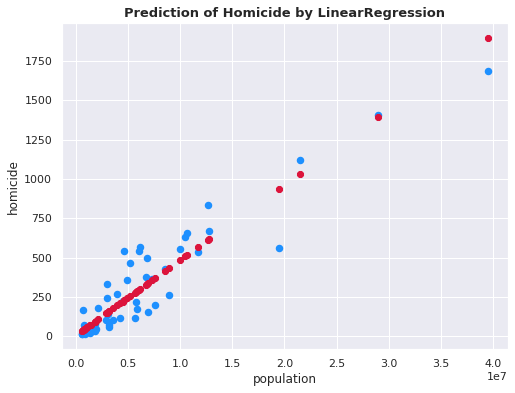

In [111]:
### visualization: homicide - reg_model

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('homicide')
plt.title('Prediction of Homicide by LinearRegression', fontsize = 13, fontweight = 'bold')
plt.show()

LinearRegression을 통해 예측한 2019년 살인죄는 약 86%의 정확도를 보였다.<br>
14% 가량은 인구 수만으로 예측하기엔 정확도가 떨어진 것이다.<br>

#### (2) DecisionTreeRegressor Model

In [112]:
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=74, splitter='best')

In [113]:
X_test = [[x] for x in df_test['population']]
y_pred = dtr_model.predict(X_test)
y_test = df_test[target]

In [114]:
dtr_model.predict(X_test)

array([  30.,  407.,  222.,  195., 1739.,  159.,   86.,  160.,   32.,
       1107.,  647.,   20.,   63.,   41.,  653.,  311.,  122.,  250.,
        476.,  217.,  369.,   23.,  555.,  146.,  599.,  232.,   37.,
        647.,   18.,   44.,   25.,  285.,  144.,   49.,  769.,  596.,
         84.,   86.,  784.,   16.,  155.,   41.,  135., 1327.,   63.,
        417.,   11.,  236.,  175.,   41.,   14.])

In [115]:
r2_score(y_test, y_pred)

0.9250251181757471

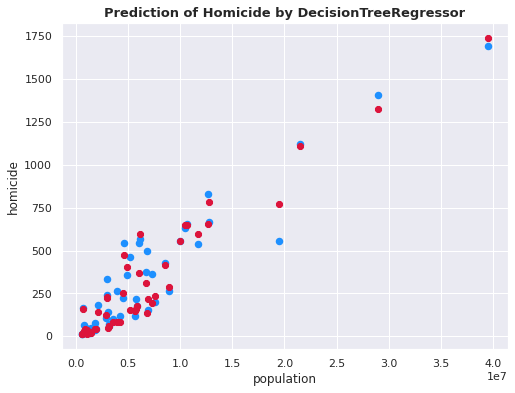

In [116]:
### visualization: homicide - dtr_model

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('homicide')
plt.title('Prediction of Homicide by DecisionTreeRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

DecisionTreeRegressor을 통해 예측한 2019년 살인죄는 약 92%의 정확도를 보였다.<br>
8% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.<br>

#### (3) RandomForestRegressor Model

In [117]:
rfr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=74, verbose=0, warm_start=False)

In [118]:
X_test = [[x] for x in df_test['population']]
y_pred = rfr_model.predict(X_test)
y_test = df_test[target]

In [119]:
rfr_model.predict(X_test)

array([  37.54,  402.69,  201.67,  217.4 , 1779.59,  199.01,   97.01,
        108.2 ,   35.84, 1084.84,  648.66,   25.96,   67.43,   54.95,
        699.06,  258.41,  123.94,  281.33,  462.46,  217.55,  407.48,
         20.34,  560.47,  164.37,  588.94,  224.81,   30.89,  648.66,
         18.7 ,   44.42,   22.94,  306.71,  143.05,   47.72,  790.99,
        647.56,  138.71,  102.79,  741.24,   23.12,  177.1 ,   33.78,
        159.86, 1357.19,   67.43,  430.05,   12.24,  249.62,  229.09,
         55.46,   14.09])

In [120]:
r2_score(y_test, y_pred)

0.932417144747102

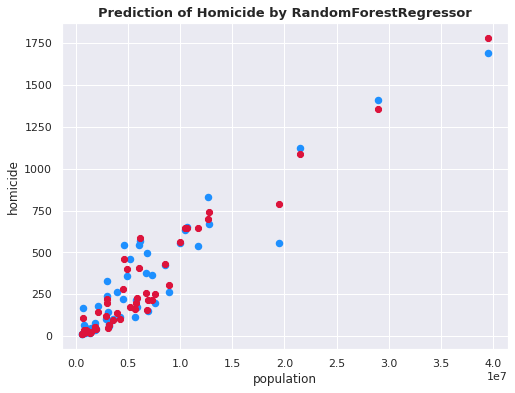

In [121]:
### visualization: homicide - dtr_model

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('homicide')
plt.title('Prediction of Homicide by RandomForestRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

RandomForestRegressor을 통해 예측한 2019년 살인죄는 약 93%의 정확도를 보였다.<br>
7% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.<br>

#### (4) GradientBoostingRegressor Model

In [122]:
gbr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=74, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [123]:
X_test = [[x] for x in df_test['population']]
y_pred = gbr_model.predict(X_test)
y_test = df_test[target]

In [124]:
gbr_model.predict(X_test)

array([  37.47539651,  352.04042304,  141.33032148,  275.13320868,
       1758.36834156,  202.77542219,  106.45979063,   73.61003353,
         34.3840106 , 1115.72920124,  601.78750132,   32.33693357,
         98.47662396,   41.42922126,  666.21852147,  242.11179646,
        130.86095439,  260.51043621,  427.55833154,  227.72108769,
        450.50197581,   32.33693357,  577.49113609,  193.73355087,
        511.30909492,  185.79753935,   32.33693357,  601.78750132,
         34.3840106 ,   66.35760564,   32.33693357,  381.00195175,
        124.9676711 ,   95.44809658,  770.40634512,  666.21852147,
        153.91031229,  153.91031229,  776.12678926,   32.33693357,
        167.17466532,   34.3840106 ,  215.07395595, 1397.09370406,
         98.47662396,  381.00195175,   27.20591076,  275.13320868,
        265.02834341,   41.42922126,   23.78437425])

In [125]:
r2_score(y_test, y_pred)

0.9303405893183747

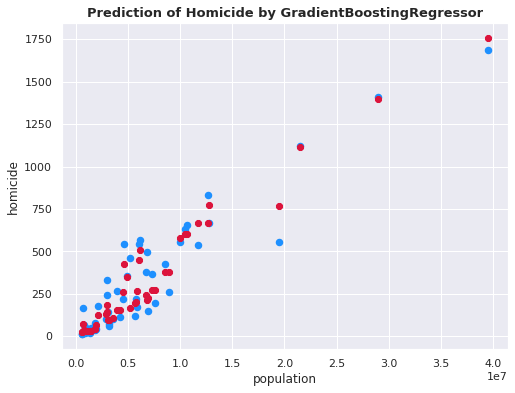

In [126]:
### visualization: homicide - dtr_model

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('homicide')
plt.title('Prediction of Homicide by GradientBoostingRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

GradientBoostingtRegressor을 통해 예측한 2019년 살인죄는 약 93%의 정확도를 보였다.<br>
7% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.<br>

4가지 회귀 모델을 통해 인구 수만으로 2019년 살인죄를 예측해본 결과는 다음과 같이 정리된다.<br>
- LinearRegression Model
 - 예측 정확도 = 0.8640797946090958
- DecisionTreeRegressor Model
 - 예측 정확도 = 0.9250251181757471
- RandomForestRegressor Model
 - 예측 정확도 = 0.932417144747102
- GradientBoostingRegressor Model
 - 예측 정확도 = 0.9303405893183747<br>
<br>

단일 회귀 모델보다 앙상블 모델을 활용했을 때 약 93%의 정확도를 보였다.

#### **2) 강간죄**

In [127]:
### rape

feature = ['population']
target = ['rape']

X_train = violent_crime[feature]
y_train = violent_crime[target]

#### (1) LinearRegression Model

In [128]:
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [129]:
X_test = [[x] for x in df_test['population']]
y_pred = reg_model.predict(X_test)
y_test = df_test[target]

In [130]:
reg_model.predict(X_test)

array([[  607.57369489],
       [ 2334.4616963 ],
       [ 1553.99122738],
       [ 3317.83459228],
       [16661.18511031],
       [ 2688.62474884],
       [ 1780.6267529 ],
       [  596.89520804],
       [  707.84243448],
       [ 9195.64698019],
       [ 4699.92205229],
       [  890.85702838],
       [ 1610.81372606],
       [ 1044.51571847],
       [ 5550.35863271],
       [ 3091.6068164 ],
       [ 1510.7366495 ],
       [ 2154.17757608],
       [ 2229.15424754],
       [ 3157.95782378],
       [ 2807.40780555],
       [  861.19272509],
       [ 4438.89356961],
       [ 2639.32057386],
       [ 2845.38771761],
       [ 1536.74776445],
       [  747.17433669],
       [ 4646.38100675],
       [  620.20648227],
       [ 1105.50968218],
       [  867.60867593],
       [ 3981.60670212],
       [ 1172.74531999],
       [ 1579.80240012],
       [ 8357.72106924],
       [ 5143.55241174],
       [ 1942.76787724],
       [ 2050.71431475],
       [ 5604.24285027],
       [  743.27608461],


In [131]:
r2_score(y_test, y_pred)

0.9070511393869687

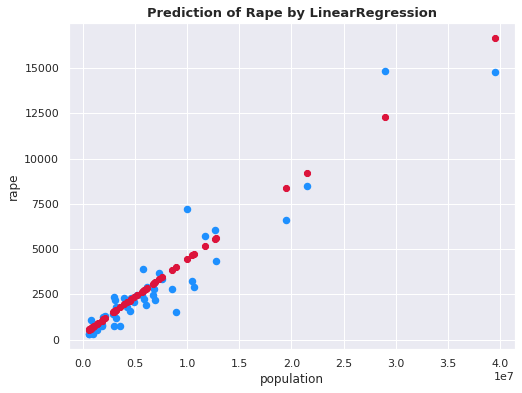

In [132]:
### visualization: rape

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('rape')
plt.title('Prediction of Rape by LinearRegression', fontsize = 13, fontweight = 'bold')
plt.show()

2019년 강간죄 예측은 약 91%의 정확도를 보였다.<br>
9% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

#### (2) DecisionTreeRegressor Model

In [133]:
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=74, splitter='best')

In [134]:
X_test = [[x] for x in df_test['population']]
y_pred = dtr_model.predict(X_test)
y_test = df_test[target]

In [135]:
dtr_model.predict(X_test)

array([  583.,  4156.,  2341.,  5435., 15506.,  2893.,   873.,   450.,
         357.,  8438.,  2798.,   936.,  1854.,   617.,  3472.,  5628.,
        1664.,  1875.,  2363.,  2250.,  3984.,   447.,  7901.,  1118.,
        2935.,   863.,   569.,  2798.,   409.,  1290.,   377.,  1424.,
        1244.,   901.,  2751.,  5852.,  2785.,  2114.,  4490.,   494.,
        2285.,   395.,  3742., 15098.,  1854.,  3072.,   326.,  3610.,
        2333.,   617.,   253.])

In [136]:
r2_score(y_test, y_pred)

0.8918662061994429

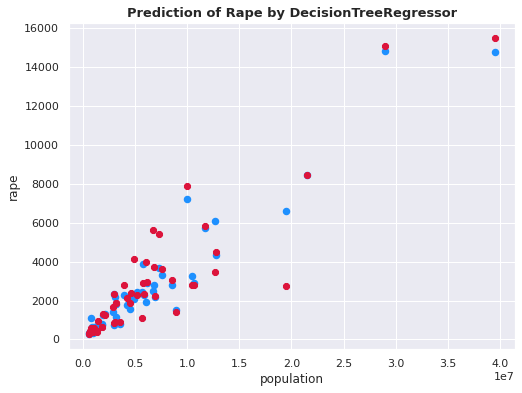

In [137]:
### visualization: rape - dtr_model

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('rape')
plt.title('Prediction of Rape by DecisionTreeRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

DecisionTreeRegressor을 통해 예측한 2019년 강간죄는 약 89%의 정확도를 보였다.<br>
10% 가량은 인구 수만으로 예측하기엔 무리가 있었다.<br>

#### (3) RandomForestRegressor Model

In [138]:
rfr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=74, verbose=0, warm_start=False)

In [139]:
X_test = [[x] for x in df_test['population']]
y_pred = dtr_model.predict(X_test)
y_test = df_test[target]

In [140]:
rfr_model.predict(X_test)

array([  915.84,  3414.55,  2187.66,  5079.71, 16657.05,  2958.86,
         851.24,   432.96,   350.42,  8571.31,  2814.78,   874.29,
        1651.8 ,   665.4 ,  3977.94,  4550.02,  1752.06,  1868.87,
        2230.49,  2684.14,  3528.69,   500.92,  6932.05,  1798.15,
        3059.37,  1422.63,   562.71,  2814.78,   533.14,  1318.91,
         445.14,  1435.13,  1410.9 ,  1189.49,  2955.58,  6401.  ,
        2624.11,  2029.31,  5099.64,   534.96,  2293.93,   453.41,
        3479.36, 15826.78,  1651.8 ,  3287.63,   294.03,  3302.94,
        2073.8 ,   667.85,   249.98])

In [141]:
r2_score(y_test, y_pred)

0.8918662061994429

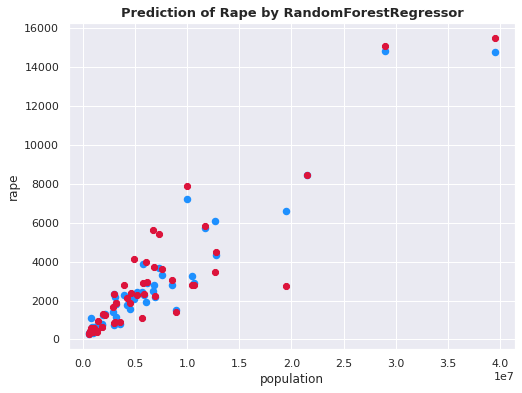

In [142]:
### visualization: rape - dtr_model

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('rape')
plt.title('Prediction of Rape by RandomForestRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

RandomForestRegressor을 통해 예측한 2019년 강간죄는 약 89%의 정확도를 보였다.<br>
10% 가량은 인구 수만으로 예측하기엔 무리가 있었다.<br>

#### (4) GradientBoostingRegressor Model

In [143]:
gbr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=74, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [144]:
X_test = [[x] for x in df_test['population']]
y_pred = gbr_model.predict(X_test)
y_test = df_test[target]

In [145]:
gbr_model.predict(X_test)

array([  631.72358546,  2846.56414157,  1767.76356876,  3839.09166047,
       15715.57998418,  2395.75696705,  1580.71806218,   570.3847438 ,
         613.33461798,  8499.92822272,  3915.35397598,   723.96521492,
        1580.71806218,   840.82260411,  4741.40477558,  3419.3282462 ,
        1767.76356876,  2103.14507355,  2169.89024106,  3185.25709746,
        2864.02254023,   665.12012237,  6574.23607835,  2679.23786393,
        2725.29558104,  1767.76356876,   630.21795131,  3915.35397598,
         648.54205945,  1315.07854311,   665.12012237,  1800.07098912,
        1481.80493271,  1707.58384115,  4104.56219407,  5380.95560558,
        2210.98902618,  2171.26740651,  5511.3029783 ,   630.21795131,
        2846.56414157,   613.33461798,  3282.91638835, 14516.82688529,
        1580.71806218,  3026.55434712,   310.07475432,  3401.46065624,
        2395.75696705,   840.82260411,   310.07475432])

In [146]:
r2_score(y_test, y_pred)

0.9538929922874335

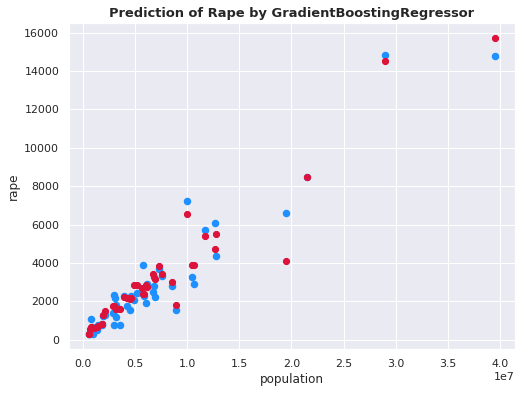

In [147]:
### visualization: rape - dtr_model

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('rape')
plt.title('Prediction of Rape by GradientBoostingRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

GradientBoositngRegressor을 통해 예측한 2019년 강간죄는 약 95%의 정확도를 보였다.<br>
5% 가량만이 인구 수만으로 예측하기 어려울 뿐이었다.<br>

4가지 회귀 모델을 통해 인구 수만으로 2019년 강간죄를 예측해본 결과는 다음과 같이 정리된다.<br>
- LinearRegression Model
 - 예측 정확도 = 0.9070511393869687
- DecisionTreeRegressor Model
 - 예측 정확도 = 0.8918662061994429
- RandomForestRegressor Model
 - 예측 정확도 = 0.8918662061994429
- GradientBoostingRegressor Model
 - 예측 정확도 = 0.9538929922874335<br>
<br>

앙상블 모델이라 하더라도 모델 성능 면에서는 다소 차이가 보였다.<br>
의사 결정 트리 모델 및 무작위 의사 결정 트리모델을 활용했을 때 오히려 예측 정확도가 떨어져 단일 회귀 모델의 성능이 더 나았기 때문이다.<br>
강간죄는 경사하강법을 통해 잔차 예측값을 최소화시켜가는 GradientBoostingRegressor Model을 사용했을 때 가장 높은 예측 정확도를 보였다.

#### **3) 강도죄**

In [148]:
### robbery

feature = ['population']
target = ['robbery']

X_train = violent_crime[feature]
y_train = violent_crime[target]

#### (1) LinearRegression Model

In [149]:
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [150]:
X_test = [[x] for x in df_test['population']]
y_pred = reg_model.predict(X_test)
y_test = df_test[target]

In [151]:
reg_model.predict(X_test)

array([[ -655.88721061],
       [ 4934.98573842],
       [ 2408.17958268],
       [ 8118.69708417],
       [51318.35878748],
       [ 6081.60360152],
       [ 3141.92168285],
       [ -690.45926347],
       [ -331.262925  ],
       [27148.36331156],
       [12593.26369591],
       [  261.25456399],
       [ 2592.14482566],
       [  758.73107264],
       [15346.58809704],
       [ 7386.27509068],
       [ 2268.1410572 ],
       [ 4351.3082735 ],
       [ 4594.04841872],
       [ 7601.08928361],
       [ 6466.16877193],
       [  165.21512733],
       [11748.17294215],
       [ 5921.97924954],
       [ 6589.13034372],
       [ 2352.35314208],
       [ -203.9242279 ],
       [12419.92229628],
       [ -614.98802713],
       [  956.20161011],
       [  185.98703954],
       [10267.68736622],
       [ 1173.87983145],
       [ 2491.74434621],
       [24435.54273201],
       [14029.53574944],
       [ 3666.86043121],
       [ 4016.3415886 ],
       [15521.04053063],
       [ -216.5449839 ],


In [152]:
r2_score(y_test, y_pred)

0.8476566319677884

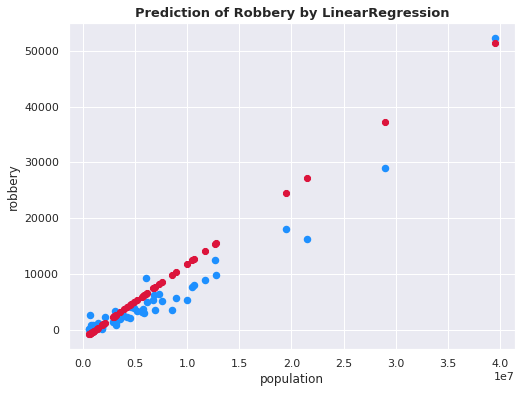

In [153]:
### visualization: robbery

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('robbery')
plt.title('Prediction of Robbery by LinearRegression', fontsize = 13, fontweight = 'bold')
plt.show()

LinearRegression을 통해 예측한 2019년 강도죄는 약 85%의 정확도를 보였다.<br>
15% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

#### (2) DecisionTreeRegressor Model

In [154]:
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=74, splitter='best')

In [155]:
X_test = [[x] for x in df_test['population']]
y_pred = dtr_model.predict(X_test)
y_test = df_test[target]

In [156]:
dtr_model.predict(X_test)

array([  630.,  3950.,  1593.,  5649., 54328.,  5101.,  2205.,  2415.,
         228., 16884.,  8499.,   952.,  1237.,  1220., 16375.,  6225.,
        1420.,  2469.,  5725.,  5801.,  5486.,   228.,  5638.,  4904.,
        5206.,  2496.,   270.,  8499.,   158.,   736.,  1065.,  6364.,
        3732.,   962., 28405.,  9608.,  2270.,  2515.,  9854.,   453.,
        3299.,  1680.,  5365., 28339.,  1237.,  3610.,    73.,  5557.,
        3493.,  1220.,    98.])

In [157]:
r2_score(y_test, y_pred)

0.9531230448450555

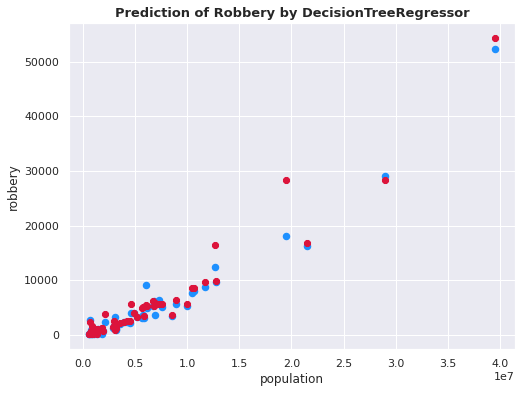

In [158]:
### visualization: robbery

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('robbery')
plt.title('Prediction of Robbery by DecisionTreeRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

DecisionTreeRegressor을 통해 예측한 2019년 강도죄는 약 95%의 정확도를 보였다.<br>
오직 5% 가량만이 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

#### (3) RandomForestRegressor Model

In [159]:
rfr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=74, verbose=0, warm_start=False)

In [160]:
X_test = [[x] for x in df_test['population']]
y_pred = rfr_model.predict(X_test)
y_test = df_test[target]

In [161]:
rfr_model.predict(X_test)

array([  716.13,  4052.34,  2157.51,  5687.07, 54597.19,  5324.95,
        2552.02,  1649.46,   414.23, 17708.09,  8766.22,   950.31,
        1177.11,   945.85, 16034.84,  6177.5 ,  1516.89,  3037.75,
        5328.41,  5549.09,  6577.57,   288.23,  7669.83,  4697.05,
        5654.27,  2580.22,   338.86,  8766.22,   176.78,   811.45,
         814.1 ,  7347.33,  3243.21,   964.22, 27946.53, 10543.71,
        2510.3 ,  2642.17, 10850.39,   406.57,  3335.69,  1278.21,
        5502.43, 29861.04,  1177.11,  3996.15,    80.91,  5595.81,
        5163.16,   951.1 ,    89.45])

In [162]:
r2_score(y_test, y_pred)

0.9536326244067856

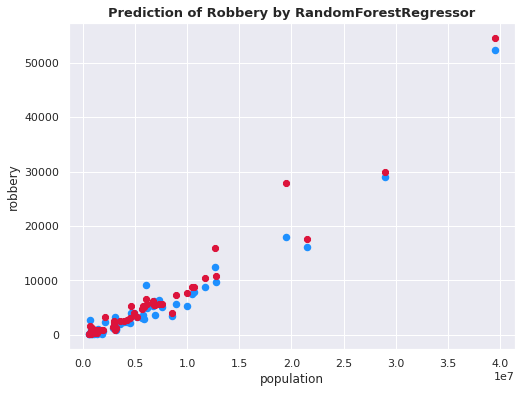

In [163]:
### visualization: robbery

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('robbery')
plt.title('Prediction of Robbery by RandomForestRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

RandomForestRegressor을 통해 예측한 2019년 강도죄는 약 95%의 정확도를 보였다.<br>
오직 5% 가량만이 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

#### (4) GradientBoostingRegressor Model

In [164]:
gbr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=74, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [165]:
X_test = [[x] for x in df_test['population']]
y_pred = gbr_model.predict(X_test)
y_test = df_test[target]

In [166]:
gbr_model.predict(X_test)

array([  642.19567027,  4064.26913327,  2356.50418092,  5988.14343698,
       54268.09023005,  5602.50868828,  2899.43144849,  1065.84796855,
         614.6856368 , 18775.00769257, 10270.62761041,   646.78478044,
        1786.43164396,   749.64072547, 14902.24323481,  6427.53297581,
        2212.33961294,  3332.57235496,  4822.59156478,  5988.14343698,
        7126.34496764,   646.78478044,  8235.9778685 ,  4304.1601069 ,
        7126.34496764,  2356.50418092,   646.78478044, 10270.62761041,
         642.19567027,   951.84097464,   646.78478044,  9085.79233743,
        2786.74722226,  1786.43164396, 25887.09246307, 12148.02708723,
        2899.43144849,  2899.43144849, 13425.5348401 ,   646.78478044,
        3905.21347615,   804.26396487,  5988.14343698, 30636.64692957,
        1786.43164396,  4977.93269425,   406.25690946,  5988.14343698,
        5441.86647082,   749.64072547,   316.50916329])

In [167]:
r2_score(y_test, y_pred)

0.9505760415727991

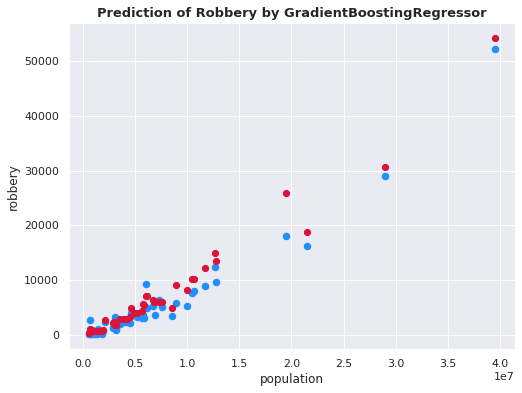

In [168]:
### visualization: robbery

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('robbery')
plt.title('Prediction of Robbery by GradientBoostingRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

GradientBoostingRegressor을 통해 예측한 2019년 강도죄는 약 95%의 정확도를 보였다.<br>
오직 5% 가량만이 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

4가지 회귀 모델을 통해 인구 수만으로 2019년 강도죄를 예측해본 결과는 다음과 같이 정리된다.<br>
- LinearRegression Model
 - 예측 정확도 = 0.8476566319677884
- DecisionTreeRegressor Model
 - 예측 정확도 = 0.9531230448450555
- RandomForestRegressor Model
 - 예측 정확도 = 0.9536326244067856
- GradientBoostingRegressor Model
 - 예측 정확도 = 0.9505760415727991<br>
<br>

단일 회귀 모델보다 앙상블 모델을 활용했을 때 약 95%의 정확도를 보였다.

#### **4) 가중 폭행죄**

In [169]:
### aggravated_assault

feature = ['population']
target = ['aggravated_assault']

X_train = violent_crime[feature]
y_train = violent_crime[target]

#### (1) LinearRegression Model

In [170]:
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [171]:
X_test = [[x] for x in df_test['population']]
y_pred = reg_model.predict(X_test)
y_test = df_test[target]

In [172]:
reg_model.predict(X_test)

array([[ 1286.87534706],
       [11862.0323998 ],
       [ 7082.56912414],
       [17884.03429446],
       [99596.35566221],
       [14030.86436795],
       [ 8470.44504553],
       [ 1221.48218002],
       [ 1900.90339506],
       [53878.71899761],
       [26347.69374324],
       [ 3021.65243723],
       [ 7430.54006795],
       [ 3962.63111033],
       [31555.61712562],
       [16498.65535979],
       [ 6817.68573046],
       [10758.00429614],
       [11217.14818692],
       [16904.97720756],
       [14758.27082329],
       [ 2839.9934843 ],
       [24749.20142796],
       [13728.93431033],
       [14990.85309532],
       [ 6976.97320335],
       [ 2141.76501596],
       [26019.81783879],
       [ 1364.23630528],
       [ 4336.14736908],
       [ 2879.28363377],
       [21948.85743472],
       [ 4747.88653728],
       [ 7240.63218629],
       [48747.40874495],
       [29064.40769383],
       [ 9463.36864753],
       [10124.41356129],
       [31885.59455493],
       [ 2117.89280887],


In [173]:
r2_score(y_test, y_pred)

0.9345306558835033

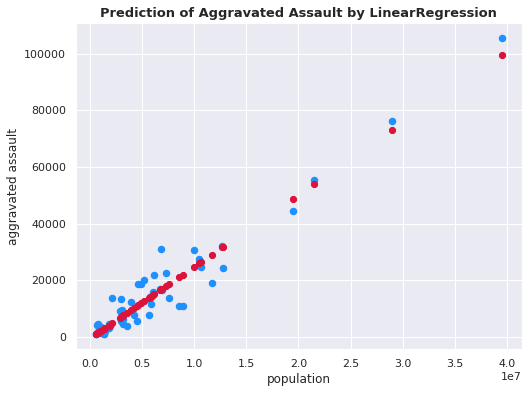

In [174]:
### visualization: aggravated_assault

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('aggravated assault')
plt.title('Prediction of Aggravated Assault by LinearRegression', fontsize = 13, fontweight = 'bold')
plt.show()

LinearRegression을 통해 예측된 2019년 가중 폭행죄는 약 93%의 정확도를 보였다.<br>
7% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

#### (2) DecisionTreeRegressor Model

In [175]:
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=74, splitter='best')

In [176]:
X_test = [[x] for x in df_test['population']]
y_pred = dtr_model.predict(X_test)
y_test = df_test[target]

In [177]:
dtr_model.predict(X_test)

array([  3169.,  17652.,  12748.,  13124., 105031.,   9826.,   4321.,
         3970.,   2181.,  55551.,  23675.,   1842.,   4397.,   3321.,
        26112.,  16614.,   9655.,   5125.,  16400.,  12285.,  18056.,
          802.,  31082.,   8482.,  21956.,   4418.,   3164.,  23675.,
         1569.,   3513.,   2136.,  10463.,  11180.,   6255.,  45538.,
        18370.,   6320.,   7431.,  23971.,   1363.,  10346.,   3597.,
        18334.,  73433.,   4397.,  10258.,    745.,  14316.,  11364.,
         3321.,    993.])

In [178]:
r2_score(y_test, y_pred)

0.9718105316776582

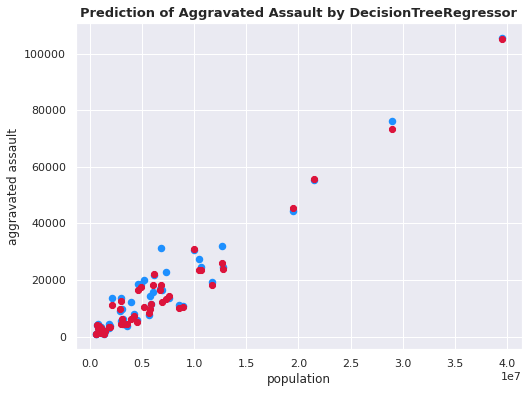

In [179]:
### visualization: aggravated_assault

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('aggravated assault')
plt.title('Prediction of Aggravated Assault by DecisionTreeRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

DecisionTreeRegressor을 통해 예측한 2019년 가중 폭행죄는 약 97%의 정확도를 보였다.<br>
오직 3%만이 인구 수만으로 예측이 어려울 따름이었다.

#### (3) RandomForestRegressor Model

In [180]:
rfr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=74, verbose=0, warm_start=False)

In [181]:
X_test = [[x] for x in df_test['population']]
y_pred = rfr_model.predict(X_test)
y_test = df_test[target]

In [182]:
rfr_model.predict(X_test)

array([  3573.71,  18141.27,  11319.19,  13782.33, 104554.13,  10381.76,
         4525.57,   3347.81,   2370.39,  56527.22,  23939.72,   1883.52,
         5016.03,   3706.95,  26985.01,  15901.  ,   9099.85,   6890.61,
        17505.07,  14356.98,  17754.99,   1021.38,  28787.27,   9477.51,
        22097.71,   6214.51,   2565.53,  23939.72,   1537.7 ,   3540.41,
         1882.39,  10842.66,  11618.32,   6206.12,  45360.41,  17598.33,
         8904.1 ,   7087.84,  23523.44,   1899.16,  11108.62,   3330.85,
        16913.97,  73778.18,   5016.03,  10190.34,    716.36,  13578.81,
        12723.98,   3727.99,    964.63])

In [183]:
r2_score(y_test, y_pred)

0.97382915820476

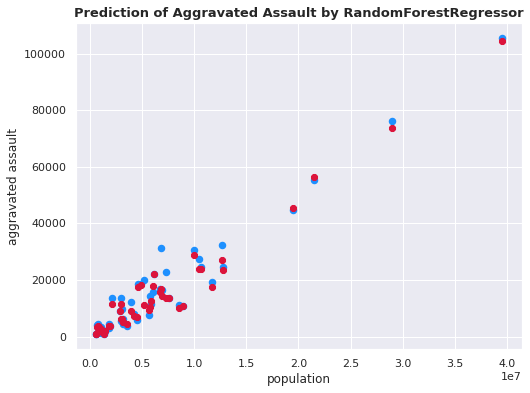

In [184]:
### visualization: aggravated_assault

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('aggravated assault')
plt.title('Prediction of Aggravated Assault by RandomForestRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

RandomForestRegressor을 통해 예측한 2019년 가중 폭행죄는 약 97%의 정확도를 보였다.<br>
오직 3%만이 인구 수만으로 예측이 어려울 따름이었다.

#### (4) GradientBoostingRegressor Model

In [185]:
gbr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=74, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [186]:
X_test = [[x] for x in df_test['population']]
y_pred = gbr_model.predict(X_test)
y_test = df_test[target]

In [187]:
gbr_model.predict(X_test)

array([  2732.17448927,  16136.91728399,   7706.93481758,  13361.26335443,
       104226.02180935,  11576.44622364,   6212.59965186,   2682.51923191,
         2267.60106161,  58696.82787903,  23676.2852563 ,   1993.39997049,
         6212.59965186,   3285.00182664,  25569.08423613,  18049.93335798,
         8140.83815917,   6401.91568503,  17010.00121733,  16976.33320157,
        18037.01236107,   1888.5810749 ,  27904.39737085,  11224.24941856,
        20825.84736774,   7328.8161065 ,   1888.5810749 ,  23676.2852563 ,
         2170.34053636,   3900.16972235,   1993.39997049,  12359.75348611,
         9061.88126306,   6595.33917354,  46267.28156707,  18609.46296412,
         7589.03090052,   7589.03090052,  24821.26234102,   1888.5810749 ,
        10660.81887617,   2378.86965056,  16976.33320157,  74589.94415146,
         6212.59965186,  11561.57328238,   1081.15362024,  13361.26335443,
        14019.26893306,   3285.00182664,   1353.54104738])

In [188]:
r2_score(y_test, y_pred)

0.9670531027641223

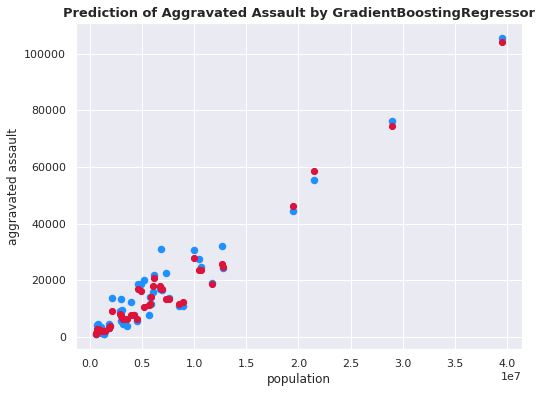

In [189]:
### visualization: aggravated_assault

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color = 'dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color = 'crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('aggravated assault')
plt.title('Prediction of Aggravated Assault by GradientBoostingRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

RandomForestRegressor을 통해 예측한 2019년 가중 폭행죄는 약 96%의 정확도를 보였다.<br>
오직 4%만이 인구 수만으로 예측이 어려울 따름이었다.

4가지 회귀 모델을 통해 인구 수만으로 2019년 가중 폭행죄를 예측해본 결과는 다음과 같이 정리된다.<br>
- LinearRegression Model
 - 예측 정확도 = 0.9345306558835033
- DecisionTreeRegressor Model
 - 예측 정확도 = 0.9718105316776582
- RandomForestRegressor Model
 - 예측 정확도 = 0.97382915820476
- GradientBoostingRegressor Model
 - 예측 정확도 = 0.9670531027641223<br>
<br>

가중 폭행죄의 경우 단일 회귀 모델부터 앙상블 모델에 이르기까지 예측 정확도가 매우 높은 편에 해당했다.<br>


#### **5) 주거 침입 절도죄**

In [190]:
### burglary

feature = ['population']
target = ['burglary']

X_train = property_crime[feature]
y_train = property_crime[target]

#### (1) LinearRegression Model

In [191]:
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [192]:
X_test = [[x] for x in df_test['population']]
y_pred = reg_model.predict(X_test)
y_test = df_test[target]

In [193]:
reg_model.predict(X_test)

array([[  5288.70117246],
       [ 28157.49200521],
       [ 17821.89647706],
       [ 41180.07890736],
       [217883.07977038],
       [ 32847.59394731],
       [ 20823.17995586],
       [  5147.28836399],
       [  6616.53762209],
       [119018.63122972],
       [ 59482.7534349 ],
       [  9040.15887835],
       [ 18574.38409403],
       [ 11075.02647852],
       [ 70744.89449914],
       [ 38184.19516559],
       [ 17249.08579491],
       [ 25770.02980014],
       [ 26762.92905905],
       [ 39062.86668803],
       [ 34420.61134975],
       [  8647.3211572 ],
       [ 56026.01173134],
       [ 32194.66980636],
       [ 34923.57081445],
       [ 17593.54516148],
       [  7137.40118946],
       [ 58773.72136657],
       [  5455.99434489],
       [ 11882.75587216],
       [  8732.28615636],
       [ 49970.26421649],
       [ 12773.14235705],
       [ 18163.70805381],
       [107922.16615779],
       [ 65357.6508741 ],
       [ 22970.37853209],
       [ 24399.88901484],
       [ 714

In [194]:
r2_score(y_test, y_pred)

0.25570438423407027

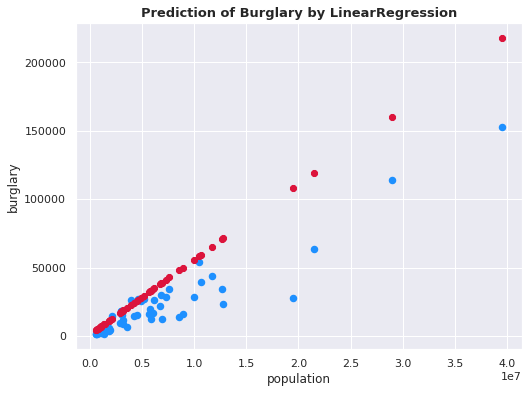

In [195]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('burglary')
plt.title('Prediction of Burglary by LinearRegression', fontsize = 13, fontweight = 'bold')
plt.show()

LinearRegression을 통해 예측한 2019년 주거 침입 절도죄는 약 24%라는 현저히 낮은 정확도를 보였다.<br>
주거 침입 절도죄의 76% 가량은 인구 수만으로 예측하기엔 정확도가 상당히 떨어졌다.

#### (2) DecisionTreeRegressor Model

In [196]:
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=74, splitter='best')

In [197]:
X_test = [[x] for x in df_test['population']]
y_pred = dtr_model.predict(X_test)
y_test = df_test[target]

In [198]:
dtr_model.predict(X_test)

array([  2950.,  34942.,  19520.,  49249., 164645.,  21375.,   7983.,
         1788.,   3686.,  71933.,  46816.,   7470.,  10079.,   8726.,
        55206.,  43412.,  12792.,  17462.,  38541.,  61376.,  38797.,
         2712.,  31834.,  26813.,  27345.,  30722.,   3329.,  46816.,
         2742.,   5308.,   8706.,  19232.,  17872.,  17201.,  65227.,
        49456.,  18690.,  16515.,  27054.,   2817.,  25725.,   6943.,
        19204., 117897.,  10079.,  15659.,   1496.,  40434.,  14180.,
         8726.,   1556.])

In [199]:
r2_score(y_test, y_pred)

0.8106480073825248

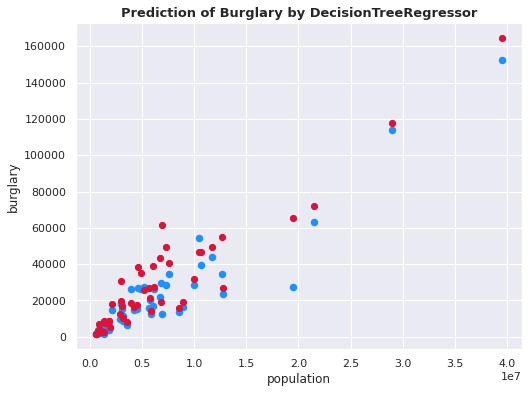

In [200]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('burglary')
plt.title('Prediction of Burglary by DecisionTreeRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

DecisionTreeRegressor을 통해 예측한 2019년 주거 침입 절도죄는 약 81% 정확도를 보였다.<br>
주거 침입 절도죄의 19% 가량은 인구 수만으로 예측하기엔 정확도가 떨어졌다.

#### (3) RandomForestRegressor Model

In [201]:
rfr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=74, verbose=0, warm_start=False)

In [202]:
X_test = [[x] for x in df_test['population']]
y_pred = rfr_model.predict(X_test)
y_test = df_test[target]

In [203]:
rfr_model.predict(X_test)

array([  3311.02,  33260.88,  18995.19,  48294.06, 171282.12,  21441.07,
         9231.61,   2236.29,   3582.31,  78964.16,  49694.1 ,   7054.31,
        11125.01,   8097.58,  52499.82,  45063.18,  13518.14,  21644.28,
        37834.6 ,  47933.83,  34121.2 ,   2715.65,  46665.59,  25422.97,
        28722.38,  27846.25,   3224.15,  49694.1 ,   2987.33,   5694.24,
         6405.97,  22822.37,  17566.7 ,  16773.95,  65636.48,  54715.54,
        22274.36,  18399.73,  31570.69,   3034.71,  26176.62,   5731.05,
        29746.87, 126201.53,  11125.01,  17233.02,   1778.01,  40281.12,
        19474.8 ,   8138.95,   1602.87])

In [204]:
r2_score(y_test, y_pred)

0.8264858520305577

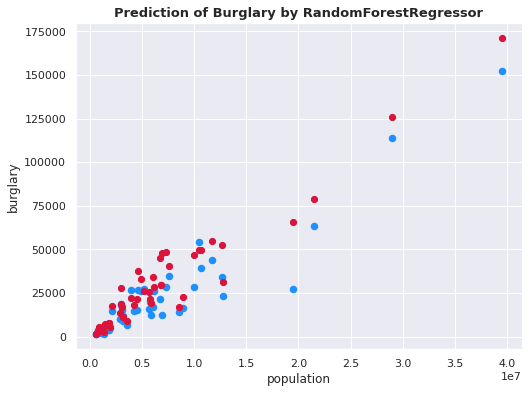

In [205]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('burglary')
plt.title('Prediction of Burglary by RandomForestRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

RandomForestRegressor을 통해 예측한 2019년 주거 침입 절도죄는 약 82%의 정확도를 보였다.<br>
주거 침입 절도죄의 18% 가량은 인구 수만으로 예측하기엔 정확도가 떨어졌다.

#### (4) GradientBoostingRegressor Model

In [206]:
gbr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=74, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [207]:
X_test = [[x] for x in df_test['population']]
y_pred = gbr_model.predict(X_test)
y_test = df_test[target]

In [208]:
gbr_model.predict(X_test)

array([  3409.19282974,  32473.99259166,  17684.97695768,  40829.40163113,
       169065.2770376 ,  26255.12787891,  16678.50684641,   3409.19282974,
         4910.46038071,  83860.87121738,  61838.93006815,   6786.7429337 ,
        16678.50684641,   7380.9978713 ,  55127.82784499,  38798.57548874,
        18312.25003747,  25958.96800683,  38360.71125458,  46263.83320176,
        32484.55552464,   4667.48064094,  56828.14065506,  26255.12787891,
        32484.55552464,  21492.21357499,   4654.65037888,  61838.93006815,
         3531.79051129,   8110.29862914,   6786.7429337 ,  32010.73064172,
        18852.07401128,  17205.64983282,  62809.98005061,  55127.82784499,
        25178.94800683,  25178.94800683,  39382.16827753,   4654.65037888,
        26742.72773744,   5598.16778992,  30926.75865663, 133119.83259403,
        16678.50684641,  28813.61381621,   3409.19282974,  40829.40163113,
        23349.2099953 ,   7380.9978713 ,   2733.08932528])

In [209]:
r2_score(y_test, y_pred)

0.7832052869508876

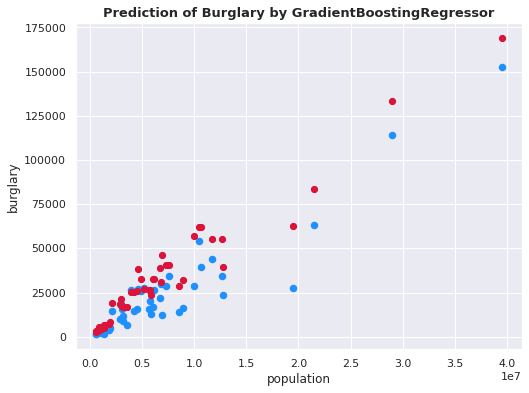

In [210]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('burglary')
plt.title('Prediction of Burglary by GradientBoostingRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

GradientBoostingRegressor을 통해 예측한 2019년 주거 침입 절도죄는 약 78%의 정확도를 보였다.<br>
주거 침입 절도죄의 22% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

4가지 회귀 모델을 통해 인구 수만으로 2019년 주거 침입 절도죄를 예측해본 결과는 다음과 같이 정리된다.<br>
- LinearRegression Model
 - 예측 정확도 = 0.25570438423407027
- DecisionTreeRegressor Model
 - 예측 정확도 = 0.8106480073825248
- RandomForestRegressor Model
 - 예측 정확도 = 0.8264858520305577
- GradientBoostingRegressor Model
 - 예측 정확도 = 0.7832052869508876<br>
<br>

주거 침입 절도죄의 경우 단일 회귀 모델부터 앙상블 모델에 이르기까지 예측 정확도가 대체로 낮은 편에 해당했다.<br>
타 형법 범죄에 비해 주거 침입 절도죄에 영향을 미치는 다른 변수가 더해질 때 예측이 높아질 것으로 예상된다.<br>
그 중 단일 회귀 모델보다 앙상블 모델을 활용했을 때 약 80% 가량 주거 침입 절도죄를 예측할 수 있었다.


#### **6) 절도죄**

In [211]:
### larceny

feature = ['population']
target = ['larceny']

X_train = property_crime[feature]
y_train = property_crime[target]

#### (1) LinearRegression Model

In [212]:
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [213]:
X_test = [[x] for x in df_test['population']]
y_pred = reg_model.predict(X_test)
y_test = df_test[target]

In [214]:
reg_model.predict(X_test)

array([[ 18448.79849609],
       [ 92035.36647218],
       [ 58777.77063042],
       [133939.08946778],
       [702529.15965044],
       [107127.0478777 ],
       [ 68435.21829974],
       [ 17993.76423917],
       [ 22721.47420842],
       [384405.848446  ],
       [192832.93362049],
       [ 30520.13622019],
       [ 61199.10464769],
       [ 37067.87737876],
       [229071.94227822],
       [124299.01692418],
       [ 56934.59612643],
       [ 84353.05606371],
       [ 87547.98006923],
       [127126.38205192],
       [112188.66013602],
       [ 29256.07377445],
       [181709.92496624],
       [105026.08648308],
       [113807.06930812],
       [ 58042.98802956],
       [ 24397.49471107],
       [190551.42967588],
       [ 18987.1098784 ],
       [ 39666.96687002],
       [ 29529.47181863],
       [162223.90668891],
       [ 42532.02808269],
       [ 59877.64254804],
       [348699.94745273],
       [211737.01748413],
       [ 75344.41499244],
       [ 79944.25462023],
       [2313

In [215]:
r2_score(y_test, y_pred)

0.9172591995517829

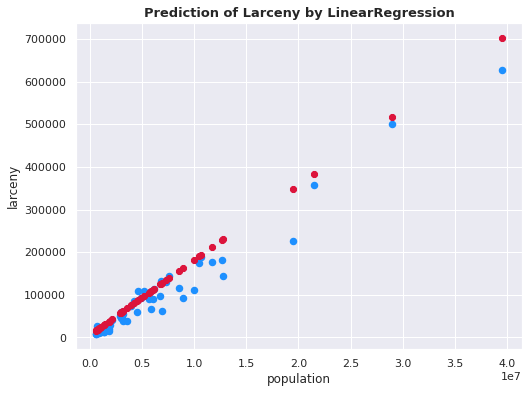

In [216]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('larceny')
plt.title('Prediction of Larceny by LinearRegression', fontsize = 13, fontweight = 'bold')
plt.show()

LinearRegression을 통해 예측한 2019년 절도죄는 약 92%의 정확도를 보였다.<br>
8% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

#### (2) DecisionTreeRegressor Model

In [217]:
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=74, splitter='best')

In [218]:
X_test = [[x] for x in df_test['population']]
y_pred = dtr_model.predict(X_test)
y_test = df_test[target]

In [219]:
dtr_model.predict(X_test)

array([ 15565., 114778.,  62350., 173423., 621779.,  89255.,  44181.,
        26345.,  19528., 372919., 205631.,  33003.,  58406.,  37496.,
       204440., 152683.,  56726.,  61313., 113251., 166338., 134514.,
        14712., 116876., 111947., 115506.,  54179.,  20641., 205631.,
        11088.,  29987.,  31681.,  94886.,  52284.,  49116., 287361.,
       188433.,  94177.,  89191., 150441.,  13270.,  96054.,  20836.,
        79155., 493238.,  58406., 116496.,   6451., 154941.,  68380.,
        37496.,   8211.])

In [220]:
r2_score(y_test, y_pred)

0.9559378787413894

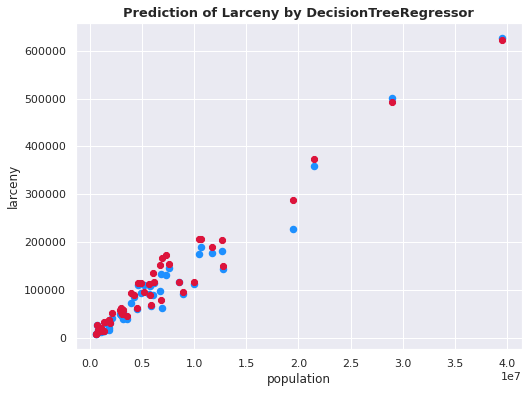

In [221]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('larceny')
plt.title('Prediction of Larceny by DecisionTreeRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

DecisionTreeRegressor을 통해 예측한 2019년 절도죄는 약 96%의 정확도를 보였다.<br>
오직 4% 가량만이 인구 수만으로 예측하기엔 정확도가 떨어졌을 뿐이다.

#### (3) RandomForestRegressor Model

In [222]:
rfr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=74, verbose=0, warm_start=False)

In [223]:
X_test = [[x] for x in df_test['population']]
y_pred = rfr_model.predict(X_test)
y_test = df_test[target]

In [224]:
rfr_model.predict(X_test)

array([ 15809.49, 108052.93,  56585.  , 170117.79, 628333.72,  88401.15,
        46648.81,  21314.75,  19085.75, 381381.73, 205104.72,  32146.25,
        52575.75,  31669.98, 201584.31, 151700.69,  57815.57,  68387.71,
       113682.91, 141784.65, 123859.65,  14927.76, 146816.63, 109492.16,
       118365.81,  55803.44,  18214.76, 205104.72,  11822.03,  30663.35,
        25703.35, 100189.29,  49898.83,  49399.27, 290250.87, 196646.46,
        86110.39,  87166.94, 160251.07,  15487.49,  98172.35,  18212.91,
       105512.41, 508449.45,  52575.75, 119784.88,   6977.72, 156200.92,
        80005.05,  31737.79,   8376.97])

In [225]:
r2_score(y_test, y_pred)

0.9656884725943314

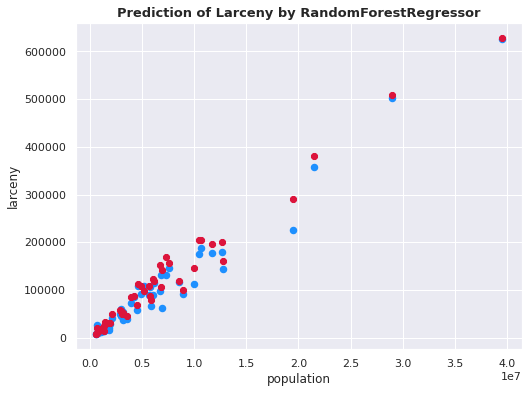

In [226]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('larceny')
plt.title('Prediction of Larceny by RandomForestRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

RandomForestRegressor을 통해 예측한 2019년 절도죄는 약 97%의 정확도를 보였다.<br>
오직 3% 가량만이 인구 수만으로 예측하기엔 정확도가 떨어졌을 뿐이다.

#### (4) GradientBoostingRegressor Model

In [227]:
gbr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=74, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [228]:
X_test = [[x] for x in df_test['population']]
y_pred = gbr_model.predict(X_test)
y_test = df_test[target]

In [229]:
gbr_model.predict(X_test)

array([ 16395.81421739, 104605.30917211,  58016.2064575 , 154748.56971596,
       626674.01105967, 102032.93065342,  54871.13227796,  16395.81421739,
        19412.16400099, 392084.77012758, 207442.12017724,  26697.32717956,
        54871.13227796,  26697.32717956, 200635.58071152, 132905.88609995,
        58016.2064575 ,  77122.60902336, 108986.44538395, 154748.56971596,
       123663.96894463,  21564.56060922, 155308.09128357, 104211.62819158,
       123663.96894463,  58016.2064575 ,  20885.10799317, 207442.12017724,
        14618.7663351 ,  33271.99952709,  26697.32717956, 111529.13866206,
        48013.78121772,  53881.8996339 , 292974.49575681, 200635.58071152,
        81984.77708315,  81984.77708315, 176323.66747112,  18861.01816765,
       103508.47366267,  19412.16400099, 105746.53531087, 517981.32642134,
        54871.13227796, 129179.24961743,  10834.99955985, 152673.02770791,
        98919.34448906,  26697.32717956,  11611.53436196])

In [230]:
r2_score(y_test, y_pred)

0.960253960459773

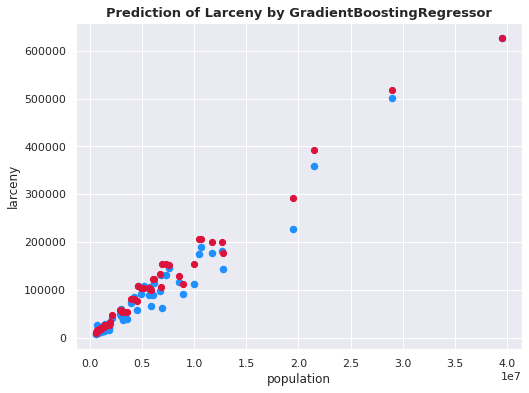

In [231]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('larceny')
plt.title('Prediction of Larceny by GradientBoostingRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

GradientBoostingRegressor을 통해 예측한 2019년 절도죄는 약 96%의 정확도를 보였다.<br>
오직 4% 가량만이 인구 수만으로 예측하기엔 정확도가 떨어졌을 뿐이다.

4가지 회귀 모델을 통해 인구 수만으로 2019년 절도죄를 예측해본 결과는 다음과 같이 정리된다.<br>
- LinearRegression Model
 - 예측 정확도 = 0.9172591995517829
- DecisionTreeRegressor Model
 - 예측 정확도 = 0.9559378787413894
- RandomForestRegressor Model
 - 예측 정확도 = 0.9656884725943314
- GradientBoostingRegressor Model
 - 예측 정확도 = 0.960253960459773<br>
<br>

절도죄의 경우 단일 회귀 모델부터 앙상블 모델에 이르기까지 예측 정확도가 매우 높은 편이었다.

#### **7) 차량 절도죄**

In [232]:
### motor_vehicle_theft

feature = ['population']
target = ['motor_vehicle_theft']

X_train = property_crime[feature]
y_train = property_crime[target]

#### (1) LinearRegression Model

In [233]:
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [234]:
X_test = [[x] for x in df_test['population']]
y_pred = reg_model.predict(X_test)
y_test = df_test[target]

In [235]:
reg_model.predict(X_test)

array([[ -2266.56779007],
       [ 10430.65830233],
       [  4692.12170106],
       [ 17661.06813964],
       [115770.23226515],
       [ 13034.6999935 ],
       [  6358.49642006],
       [ -2345.08310881],
       [ -1529.32550481],
       [ 60878.64377666],
       [ 27823.09193317],
       [  -183.68081033],
       [  5109.91840375],
       [   946.11980643],
       [ 34076.06579711],
       [ 15997.69146643],
       [  4374.08535219],
       [  9105.08986163],
       [  9656.36808484],
       [ 16485.54808564],
       [ 13908.07181942],
       [  -401.79244551],
       [ 25903.83737904],
       [ 12672.18299383],
       [ 14187.32532632],
       [  4565.3363234 ],
       [ -1240.13126946],
       [ 27429.42265069],
       [ -2173.68315749],
       [  1394.58788712],
       [  -354.61811906],
       [ 22541.56099474],
       [  1888.94889602],
       [  4881.90256454],
       [ 54717.65665342],
       [ 31084.95661157],
       [  7550.66552016],
       [  8344.35933344],
       [ 344

In [236]:
r2_score(y_test, y_pred)

0.7934903723892941

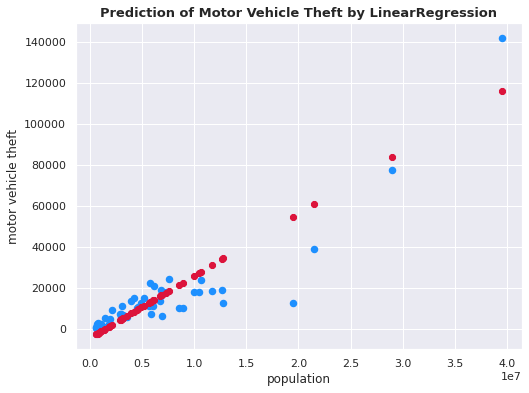

In [237]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('motor vehicle theft')
plt.title('Prediction of Motor Vehicle Theft by LinearRegression', fontsize = 13, fontweight = 'bold')
plt.show()

LinearRegression을 통해 예측한 2019년 차량 절도죄는 약 79%의 정확도를 보였다.<br>
21% 가량은 인구 수만으로 예측하기엔 정확도가 다소 떨어졌다.

#### (2) DecisionTreeRegressor Model

In [238]:
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=74, splitter='best')

In [239]:
X_test = [[x] for x in df_test['population']]
y_pred = dtr_model.predict(X_test)
y_test = df_test[target]

In [240]:
dtr_model.predict(X_test)

array([  1522.,  13110.,   7307.,  32322., 155220.,   9905.,   7192.,
         2593.,   1612.,  41165.,  25356.,   5549.,   7809.,   3509.,
        16720.,  17311.,   7931.,  10460.,   9400.,  26663.,  16344.,
          777.,  17476.,   8932.,  19847.,   4908.,   2817.,  25356.,
         1791.,   4898.,   5280.,  11037.,  11709.,   4040.,  19249.,
        19959.,  10275.,  16695.,  13138.,   1538.,  11002.,   1906.,
         8071.,  70008.,   7809.,  10776.,    264.,  27881.,   8678.,
         3509.,    761.])

In [241]:
r2_score(y_test, y_pred)

0.940899583373489

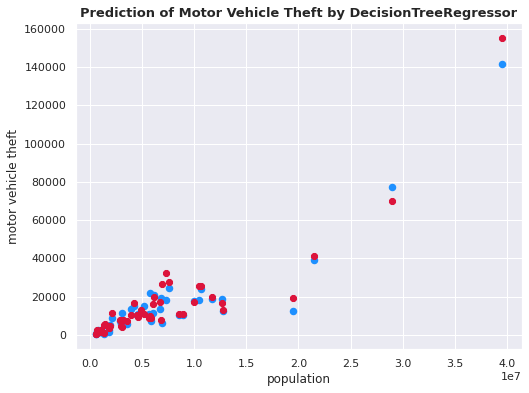

In [242]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('motor vehicle theft')
plt.title('Prediction of Motor Vehicle Theft by DecisionTreeRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

DecisionTreeRegressor을 통해 예측한 2019년 차량 절도죄는 약 94%의 정확도를 보였다.<br>
오직 6% 가량만이 인구 수만으로 예측하기엔 정확도가 다소 떨어질 뿐이었다.

#### (3) RandomForestRegressor Model

In [243]:
rfr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=74, verbose=0, warm_start=False)

In [244]:
X_test = [[x] for x in df_test['population']]
y_pred = rfr_model.predict(X_test)
y_test = df_test[target]

In [245]:
rfr_model.predict(X_test)

array([  2334.16,  12998.44,   8066.08,  29821.49, 160389.49,  10429.42,
         7132.31,   2153.5 ,   1561.3 ,  41477.45,  24805.42,   5512.21,
         6911.32,   3114.27,  17302.03,  18959.36,   7678.55,  10493.84,
        10508.74,  21138.06,  15479.04,    814.83,  20311.45,  11825.  ,
        19626.44,   5738.98,   2353.44,  24805.42,   1825.64,   4935.73,
         3726.05,  11849.12,  10684.52,   4252.9 ,  19871.16,  20086.12,
        11346.22,  15445.74,  13051.91,   1880.21,  11516.2 ,   1780.39,
        12887.06,  69266.13,   6911.32,  10445.8 ,    262.82,  26263.48,
        10505.51,   3119.69,    746.22])

In [246]:
r2_score(y_test, y_pred)

0.9496833311628731

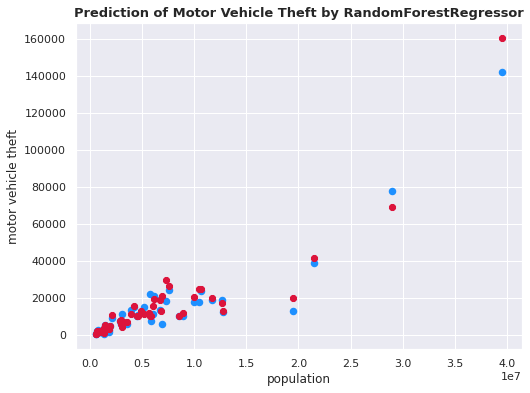

In [247]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('motor vehicle theft')
plt.title('Prediction of Motor Vehicle Theft by RandomForestRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

RandomForestRegressor을 통해 예측한 2019년 차량 절도죄는 약 95%의 정확도를 보였다.<br>
오직 5% 가량만이 인구 수만으로 예측하기엔 정확도가 다소 떨어질 뿐이었다.

#### (4) GradientBoostingRegressor Model

In [248]:
gbr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=74, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [249]:
X_test = [[x] for x in df_test['population']]
y_pred = gbr_model.predict(X_test)
y_test = df_test[target]

In [250]:
gbr_model.predict(X_test)

array([  1798.43209408,  11326.62397149,   6566.20733828,  25849.35515452,
       155891.21410721,  12139.68725094,   6890.9419486 ,   1798.43209408,
         1798.43209408,  42629.17407991,  22067.04052022,   4046.01257575,
         6890.9419486 ,   2906.74244779,  18626.64229212,  15730.39449237,
         7015.65762744,  10135.86985928,  11137.78036122,  21272.93214279,
        15423.83886334,   1567.25669298,  21109.02526185,  12840.41725094,
        15702.27219667,   6566.20733828,   1798.43209408,  22067.04052022,
         1798.43209408,   5160.34380261,   3950.90757575,  13966.50250179,
         8611.99849559,   6209.05124877,  19332.01230178,  19590.59576311,
        10404.7772408 ,  12008.14164939,  14365.42945592,   1798.43209408,
        11326.62397149,   1798.43209408,  11557.69088593,  69878.94408771,
         6890.9419486 ,  11697.46217589,    925.26492496,  25849.35515452,
        12467.15365531,   2906.74244779,   1050.6181191 ])

In [251]:
r2_score(y_test, y_pred)

0.9597555376130377

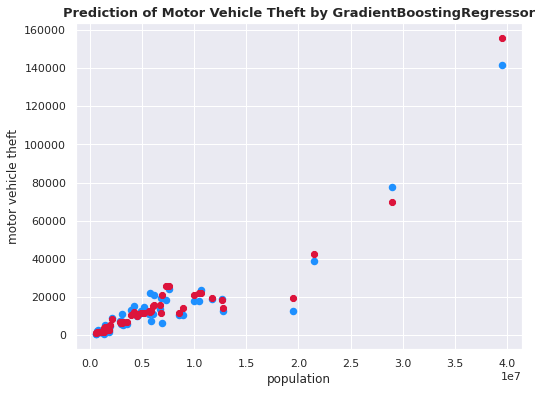

In [252]:
### visualization

plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, color ='dodgerblue', marker = 'o', linewidth = 1.5)

plt.scatter(X_test, y_pred, color ='crimson', marker = '8', linewidth = 1.5)

plt.xlabel('population')
plt.ylabel('motor vehicle theft')
plt.title('Prediction of Motor Vehicle Theft by GradientBoostingRegressor', fontsize = 13, fontweight = 'bold')
plt.show()

GradientBoostingRegressor을 통해 예측한 2019년 차량 절도죄는 약 96%의 정확도를 보였다.<br>
오직 4% 가량만이 인구 수만으로 예측하기엔 정확도가 다소 떨어질 뿐이었다.

4가지 회귀 모델을 통해 인구 수만으로 2019년 차량 절도죄를 예측해본 결과는 다음과 같이 정리된다.<br>
- LinearRegression Model
 - 예측 정확도 = 0.7934903723892941
- DecisionTreeRegressor Model
 - 예측 정확도 = 0.940899583373489
- RandomForestRegressor Model
 - 예측 정확도 = 0.9496833311628731
- GradientBoostingRegressor Model
 - 예측 정확도 = 0.9597555376130377<br>
<br>

차량 절도죄의 경우 단일 회귀 모델보다 앙상블 모델을 활용했을 때 예측 정확도가 높은 편이었다.

### **5. 정리**




### 정부 부처에 보고 올립니다.<br>
#### **"각 형법 범죄 발생에 인구 수는 상당한 영향력을 행사하고 있었습니다."**<br>
<br>
1) 살인죄<br>
- 살인죄는 인구 10만명 당 5건의 사건이 예측됐습니다.<br>
- 다른 범죄에 비해 가장 작은 비율로 증가했지만 살인죄는 인간의 생명을 해한다는 조건이 필요하므로 납득되는 수치로 보입니다.<br>
- 인구 수만으로 살인죄 발생의 90%를 설명할 수 있었습니다.<br>
<br>
2) 강간죄<br>
- 강간죄는 인구 10만명 당 40건의 사건이 예측됐습니다.<br>
- 인구 수만으로 강간죄 발생의 70%를 설명할 수 있었습니다.<br>
- 살인죄보다는 인구 수만으로는 설명할 수 없는 30%의 간극이 존재했습니다.<br>
<br>
3) 강도죄<br>
- 강도죄는 인구 10만명 당 130건의 사건이 예측됐습니다.<br>
- 인구 수만으로 강도죄 발생의 94%를 설명할 수 있었습니다.<br>
<br>
4) 가중 폭행죄<br>
- 가중 폭행죄는 인구 10만명 당 250건의 사건이 예측됐습니다.<br>
- 인구 수만으로 가중 폭행죄 발생의 91%를 설명할 수 있었습니다.<br>
<br>
5) 주거 침입 절도죄<br>
- 주거 침입 절도죄는 인구 10만명 당 550건의 사건이 예측됐습니다.<br>
- 인구 수만으로 주거 침입 절도죄 발생의 81%를 설명할 수 있었습니다.<br>
- 주거 침입 절도죄는 재산범죄 중 충족해야할 요건이 까다로움에도 인구 수만으로 80% 가량이 설명되어 흥미로운 결과로 보입니다.<br>
<br>
6) 절도죄<br>
- 절도죄는 인구 10만명 당 1770건의 사건이 예측됐습니다.<br>
- 인구 수만으로 절도죄 발생의 93%를 설명할 수 있었습니다.<br>
<br>
7) 차량 절도죄<br>
- 차량 절도죄는 인구 10만명 당 300건의 사건이 예측됐습니다.<br>
- 인구 수만으로 차량 절도죄 발생의 79%를 설명할 수 있었습니다.<br>
<br>

#### **"강력범죄보다 재산범죄의 경우 인구 10만명 당 적게는 몇 백건에서 많게는 천 여건의 사건 발생이 예상되고 있었습니다."**<br>**"그러나 이는 강력범죄에 비해 재산범죄의 범죄 구성요건 충족이 수월하다는 점으로 해석됩니다."**<br>**"강간죄를 제외한 강력범죄에서도 인구 수만으로 90% 이상 설명 및 예측할 수 있어 범죄 발생 예측에 유의미한 지표로 사료됩니다."**<br>**"오직 인구 수만으로 2019년 범죄 발생을 예측해본 결과는 다음과 같습니다."**<br>



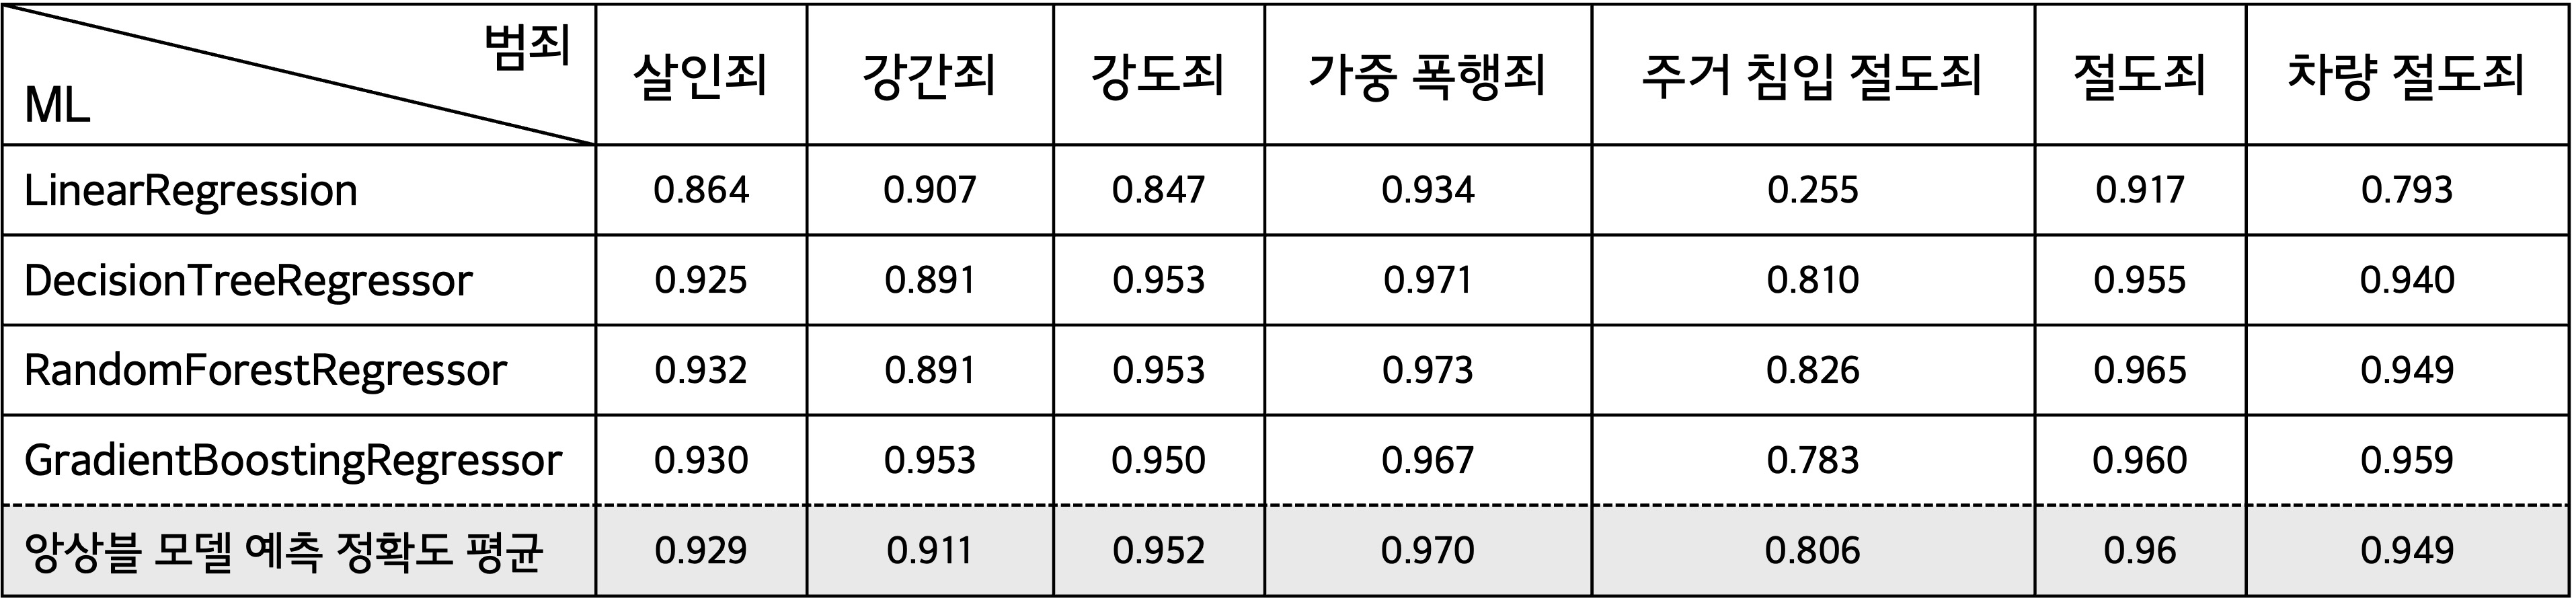





본 모델 성능은 하이퍼파라미터를 조정하지 않고 예측한 결과입니다.<br>
그럼에도 2009년부터 2018년의 10년 데이터를 바탕으로 학습하여 2019년 실 범죄 발생을 적게는 80% 많게는 95% 이상 높은 정확도를 보이고 있습니다.<br>
인구 수와 형법 범죄의 인과관계를 토대로 정교한 범죄 예측이 가능한 바,<br>
이로써 각 도시의 인구 규모에 맞는 부서 인원 배치 및 자원 대응이 가능하므로 범죄 예방률에 크게 기여할 것으로 기대됩니다.<br>   




#### **이후 2020년 인구 수를 통한 범죄 예측 정확도를 기반으로 요원 배치 등을 새로이 한 결과,<br> 범죄 발생률은 크게 줄어들어 본 부서의 탁월한 업무 능력을 보여줄 수 있었다.<br>그로 인해 정부로부터 더 많은 차기 예산안을 약속 받으며 유망한 부서로서의 지위를 공고히 할 수 있었다.**    